D:\DATA\Aging_DTI_SHARED_NEW


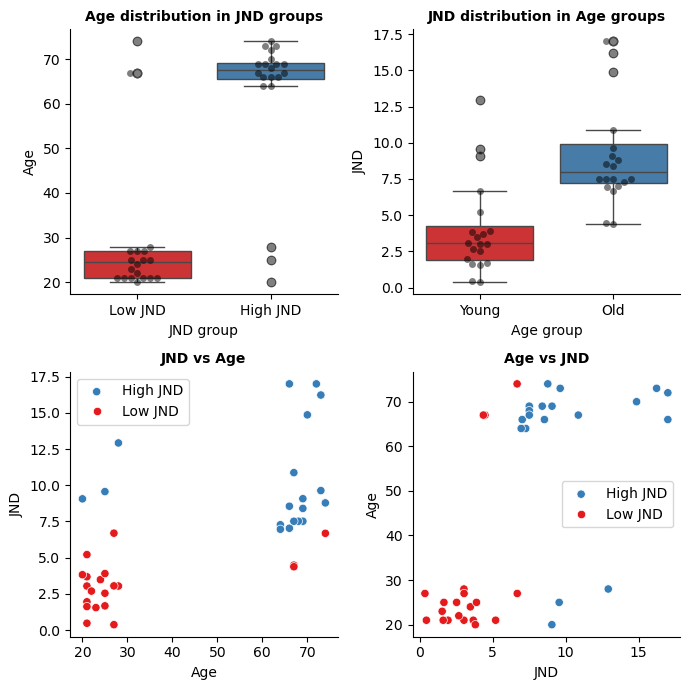

In [45]:
#dti_metric choose 'FA','MD','RD' or 'AD'
dti_metric='FA'




addtocc='_40old' #addtocc='_46removed'

sujectpreprocfile='Subject_preproc'+addtocc+'.csv'
namefeature=addtocc[1:]+'_SavedFeaturesSelectedBackward20to2_CC'


nFeatures=5

RandomState=0
nclust=2
#KNN
knn_test_size=0.1
looking_for_best_k=1
knn_K_num_shuffles = 100  ## MOVED in the top section 
num_shuffles = knn_K_num_shuffles

make_jointplot=0

#________________________________________________________________________

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SequentialFeatureSelector
from matplotlib import rcParams
rcParams['svg.fonttype'] = 'path'

cwd = os.getcwd()
print(cwd)
pathfile=r'/media/nicolascatz/4d767acb-7d35-42a5-b630-86a61f8774d0/nicolascatz/DATA_LINUX_SHARED/Aging_DTI_SHARED_NEW/'
pathsavefigure=r'/media/nicolascatz/4d767acb-7d35-42a5-b630-86a61f8774d0/nicolascatz/DATA_LINUX_SHARED/Aging_DTI_SHARED_NEW/FIGURES/'
pathfile=r'D:\DATA\Aging_DTI_SHARED_NEW/'
pathsavefigure=r'D:\DATA\Aging_DTI_SHARED_NEW\FIGURES/'




os.chdir(pathfile)
cwd = os.getcwd()

##  OPEN DATA FILE / CSV subject

SubjectTable= pd.read_csv(sujectpreprocfile, sep=",")


## create 2 groups of JND below and above median of JND q=2

labels = [0,1]

SubjectTable['JND_group'] = pd.qcut(SubjectTable['JND_P'], q=2, labels=labels)
SubjectTable['JND_group'] = pd.qcut(SubjectTable['JND_P'], q=2, labels=labels)






fig, ax = plt.subplots(2, 2, figsize=(7, 7))

sns.boxplot(x='JND_group', y='age', data=SubjectTable,  palette='Set1',ax=ax[0,0])
ax[0,0].set_title('Age distribution in JND groups', fontsize=10, fontweight='bold')
sns.swarmplot(x='JND_group', y='age', data=SubjectTable, color='black', alpha=0.5,ax=ax[0,0])
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].set_xticklabels(['Low JND','High JND'])
ax[0,0].set_xlabel('JND group')
ax[0,0].set_ylabel('Age')

sns.boxplot(x='group', y='JND_P', data=SubjectTable, palette='Set1',ax=ax[0,1])
ax[0,1].set_title('JND distribution in Age groups', fontsize=10, fontweight='bold')
sns.swarmplot(x='group', y='JND_P', data=SubjectTable, color='black', alpha=0.5,ax=ax[0,1])
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].set_xticklabels(['Young','Old'])
ax[0,1].set_xlabel('Age group')
ax[0,1].set_ylabel('JND')

sns.scatterplot(x='age', y='JND_P', data=SubjectTable, hue='JND_group', palette='Set1',ax=ax[1,0],legend=['Low JND','High JND'])
ax[1,0].legend(['High JND','Low JND'])
ax[1,0].set_title('JND vs Age', fontsize=10, fontweight='bold')
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].set_xlabel('Age')
ax[1,0].set_ylabel('JND')



sns.scatterplot(x='JND_P', y='age', data=SubjectTable, hue='JND_group', palette='Set1',ax=ax[1,1])
ax[1,1].set_title('Age vs JND', fontsize=10, fontweight='bold')
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].set_xlabel('JND')
ax[1,1].set_ylabel('Age')
ax[1,1].legend(['High JND','Low JND'])


plt.tight_layout()

plt.savefig(os.path.join(pathsavefigure,'JND vs Age_figure1.pdf'), dpi=300, bbox_inches='tight')





In [46]:
dataDTIallCC=[]

list_of_selfeaturesallCC=[]
for CC in range(1,8):
    print('CC_'+str(CC) +'_'+dti_metric+addtocc+'.csv')
    dataDTI = pd.read_csv('CC_'+str(CC) +'_'+dti_metric+addtocc+'.csv', sep=",")
    dataDTIallCC.append(dataDTI)

    list_of_selfeatures_all=np.load(namefeature+str(CC)+'_FA.npy',allow_pickle=True)
    list_of_selfeaturesallCC.append(list_of_selfeatures_all)




CC_1_FA_40old.csv
CC_2_FA_40old.csv
CC_3_FA_40old.csv
CC_4_FA_40old.csv
CC_5_FA_40old.csv
CC_6_FA_40old.csv
CC_7_FA_40old.csv


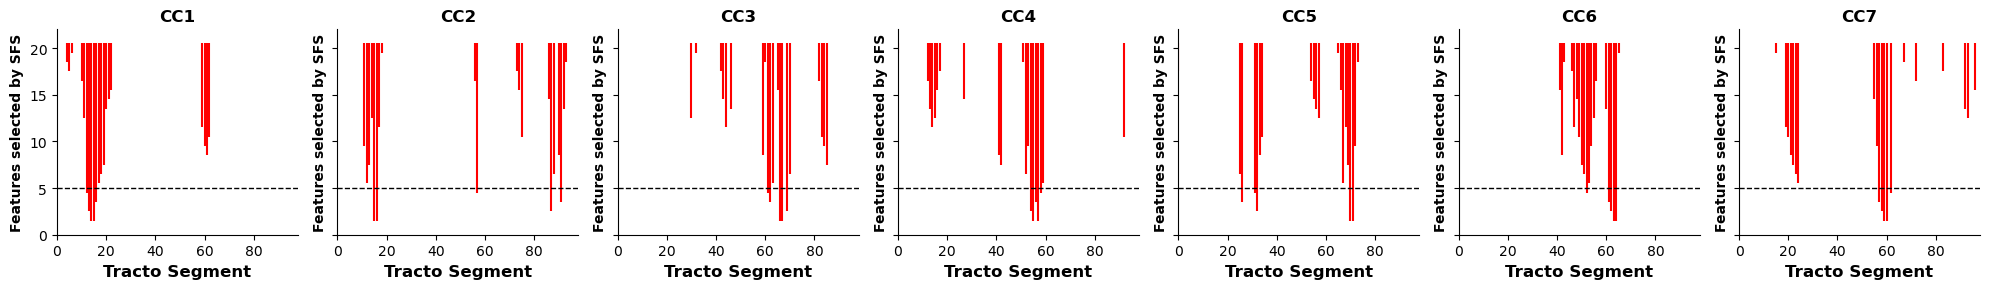

In [47]:

fig, axs = plt.subplots(1, 7, figsize=(20, 3),sharey='row')

for CC in range(0,7):
    list_of_selfeatures_all=list_of_selfeaturesallCC[CC]
    
    for i in [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2]:
        x=[i]*len(list_of_selfeatures_all[i])
        y=np.zeros(len(list_of_selfeatures_all[i]))
        for k in range(len(list_of_selfeatures_all[i])):
            y[k]=int(list_of_selfeatures_all[i][k])
            list(list_of_selfeatures_all[i])
            # create a vertical plot

        axs[CC].eventplot(y, colors='red', lineoffsets=i,linelengths=1, orientation='horizontal')

    axs[CC].set_xlabel("Tracto Segment", fontsize=12, fontweight='bold')
    axs[CC].set_ylabel("Features selected by SFS", fontsize=10, fontweight='bold')
    axs[CC].set_xlim(0,98)
    axs[CC].spines['top'].set_visible(False)
    axs[CC].spines['right'].set_visible(False)
    #axs[CC-1].suptitle(u'Segment selected vs feature ID during Backward SFS from 20 to 2', fontsize=12, fontweight='bold')
    axs[CC].axhline(y=nFeatures, color='k', linestyle='--', linewidth=1)
    axs[CC].set_title('CC'+str(CC+1), fontsize=12, fontweight='bold')
plt.tight_layout()

plt.savefig(os.path.join(pathsavefigure,'figure2.pdf'), dpi=300, bbox_inches='tight')
          


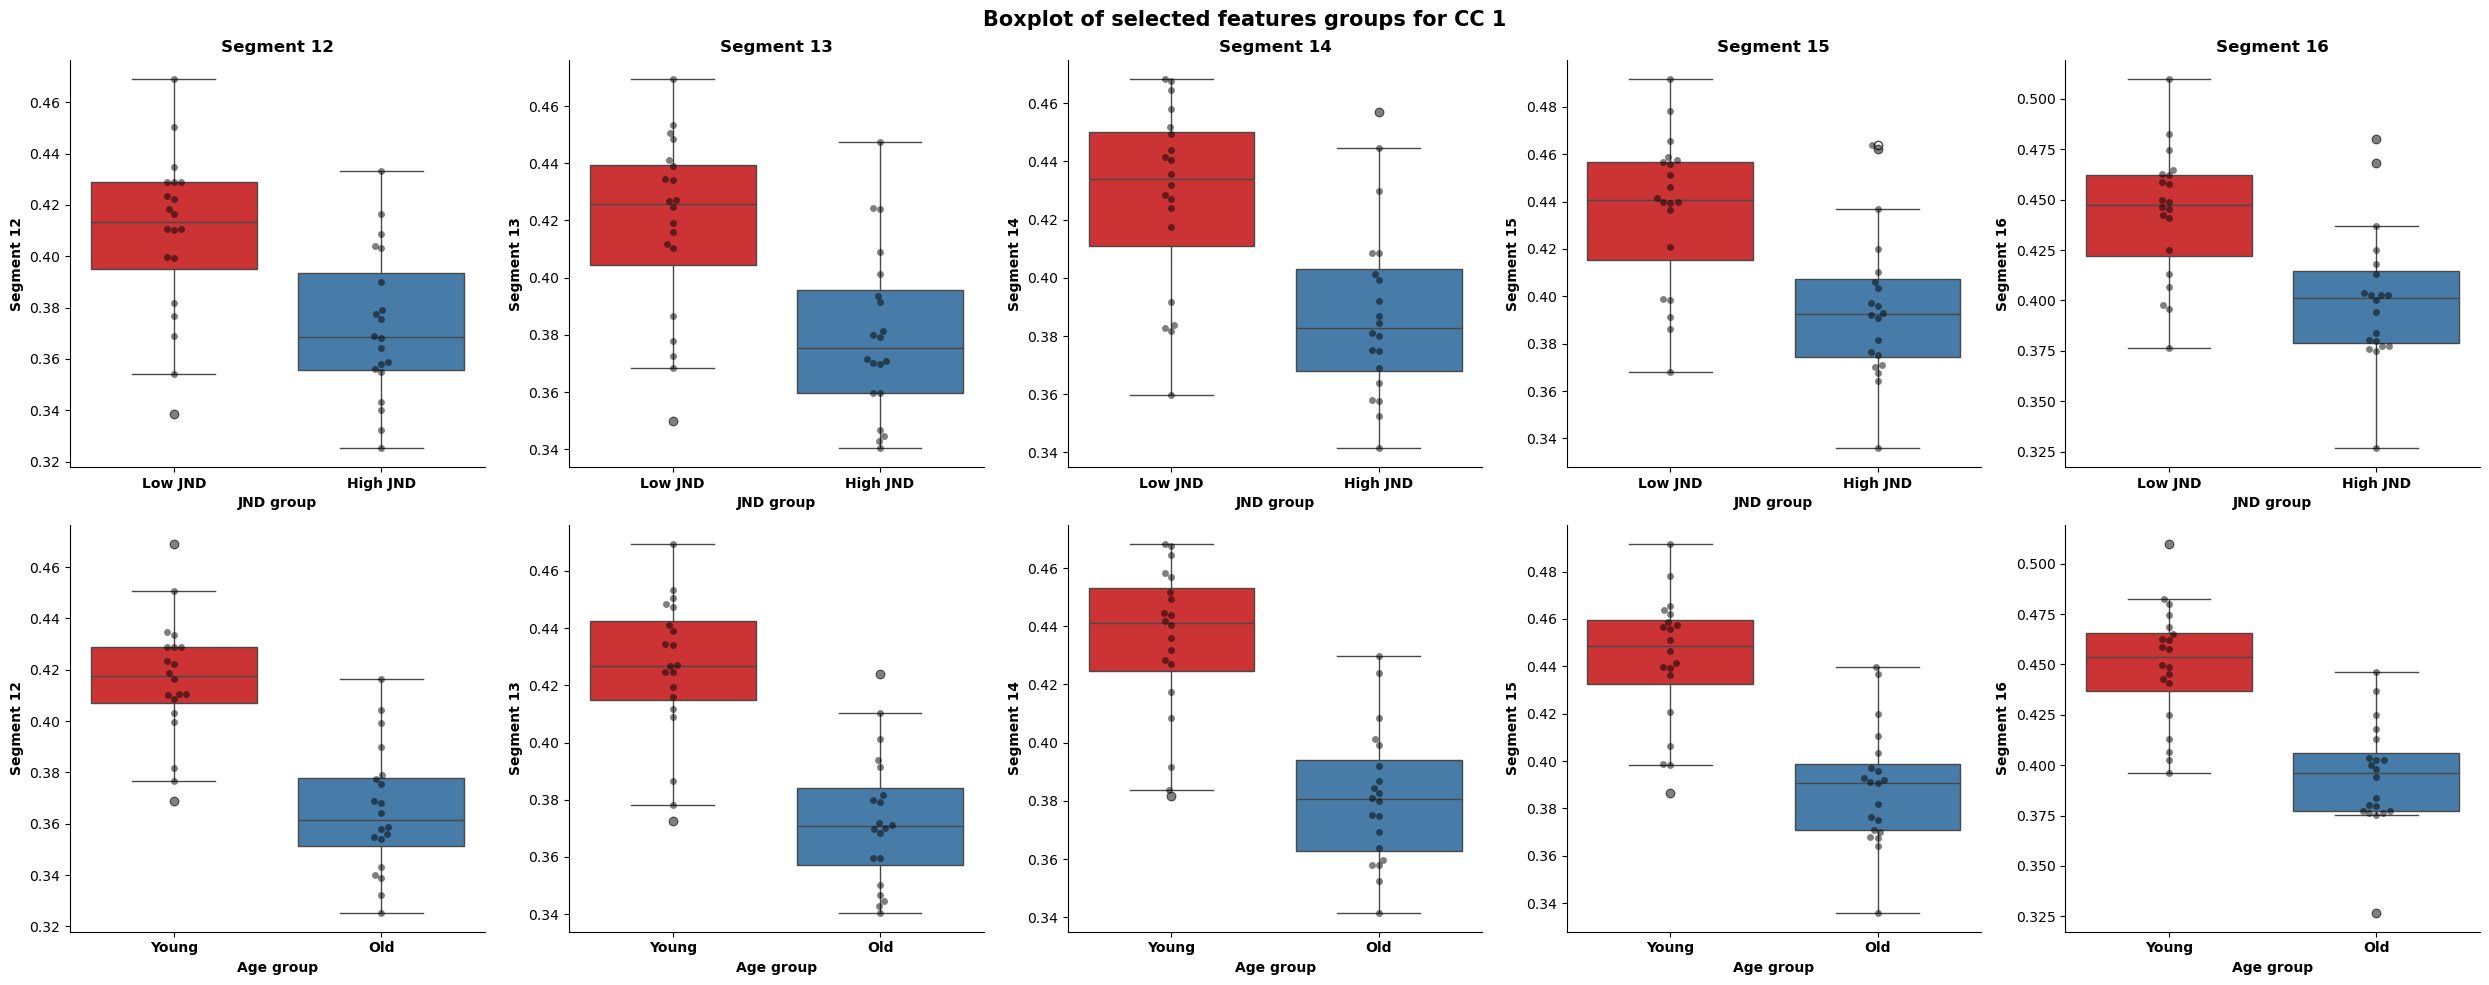

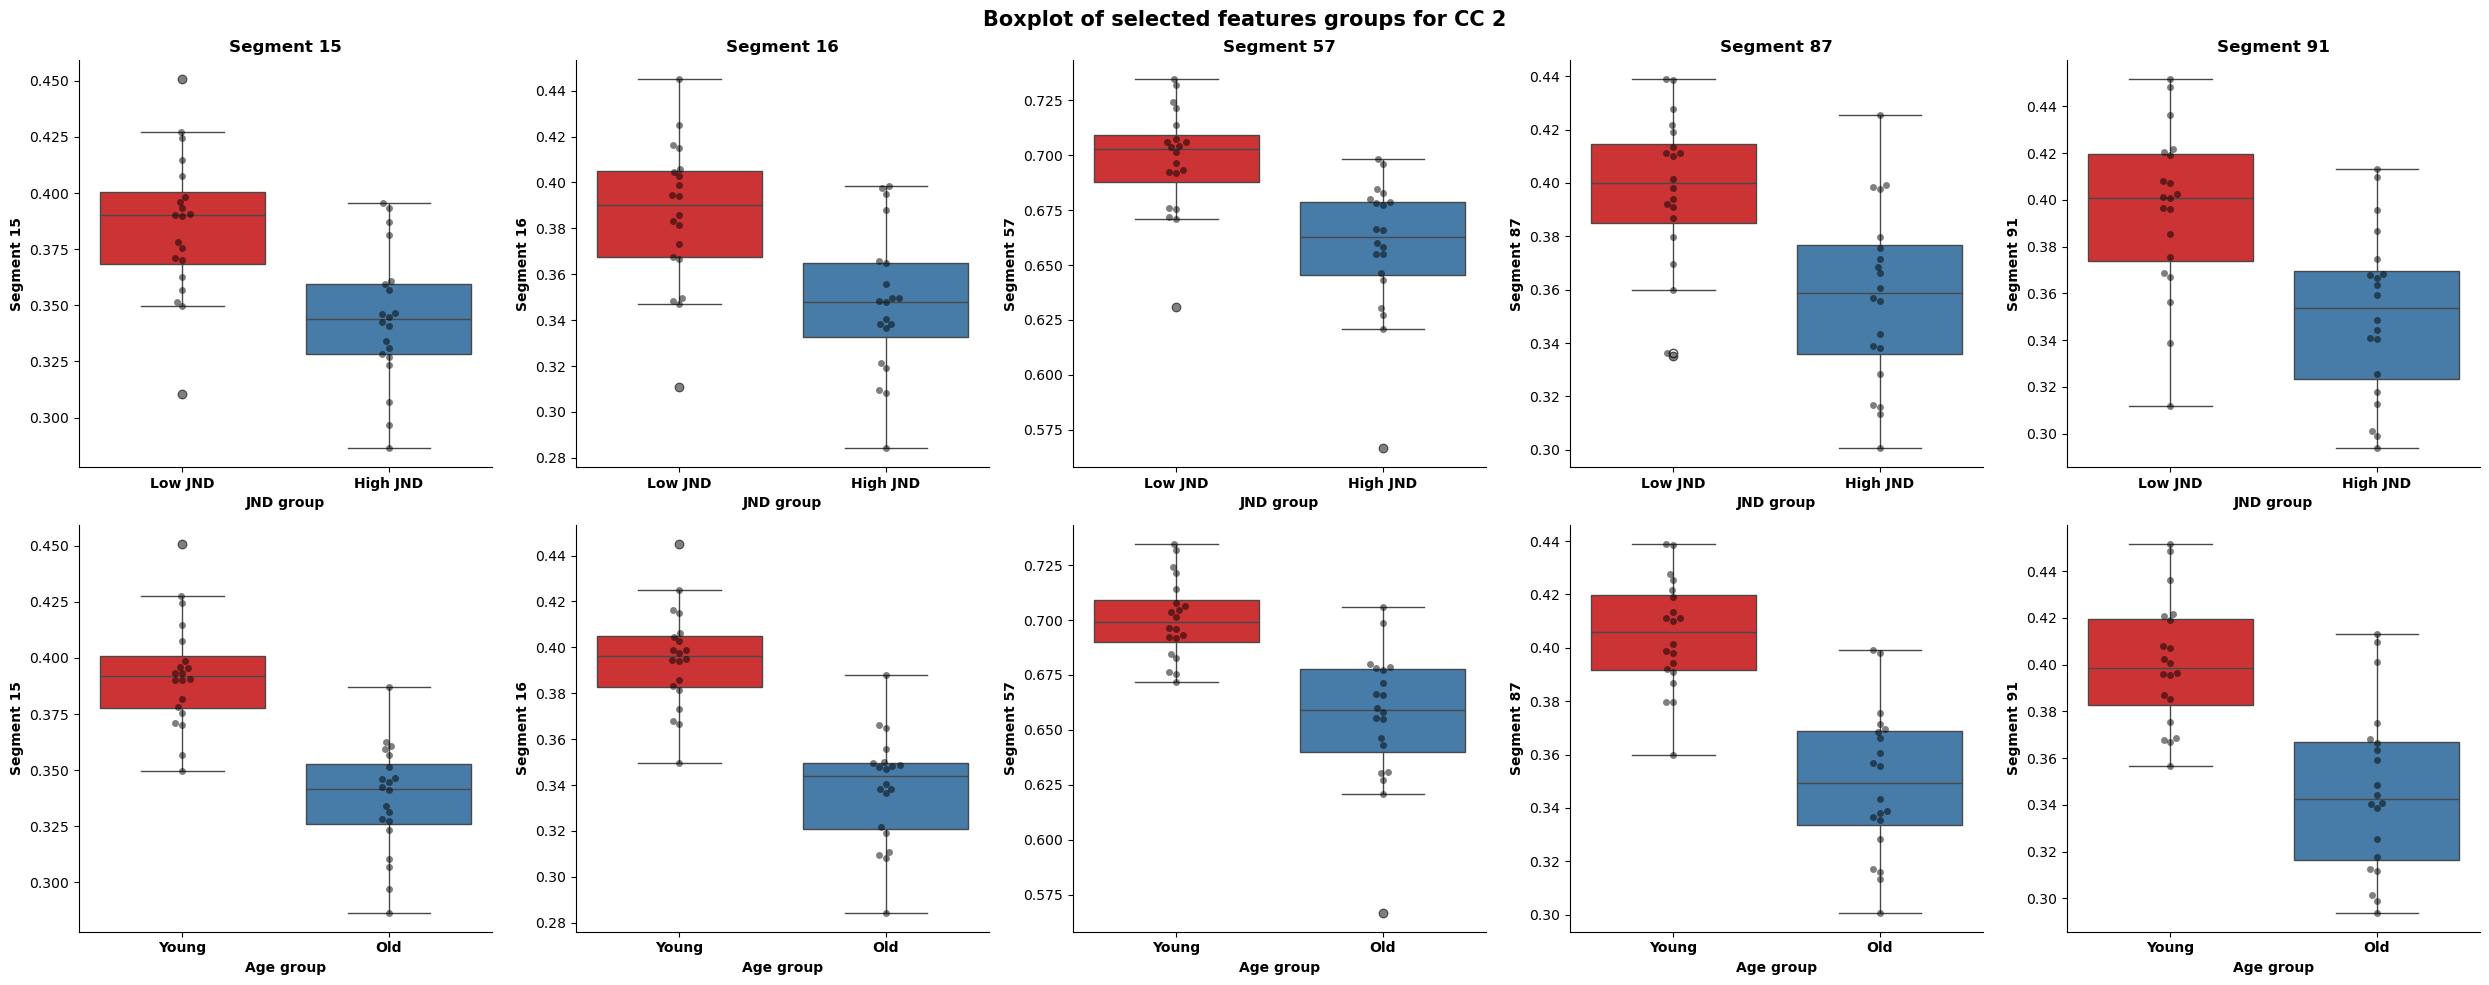

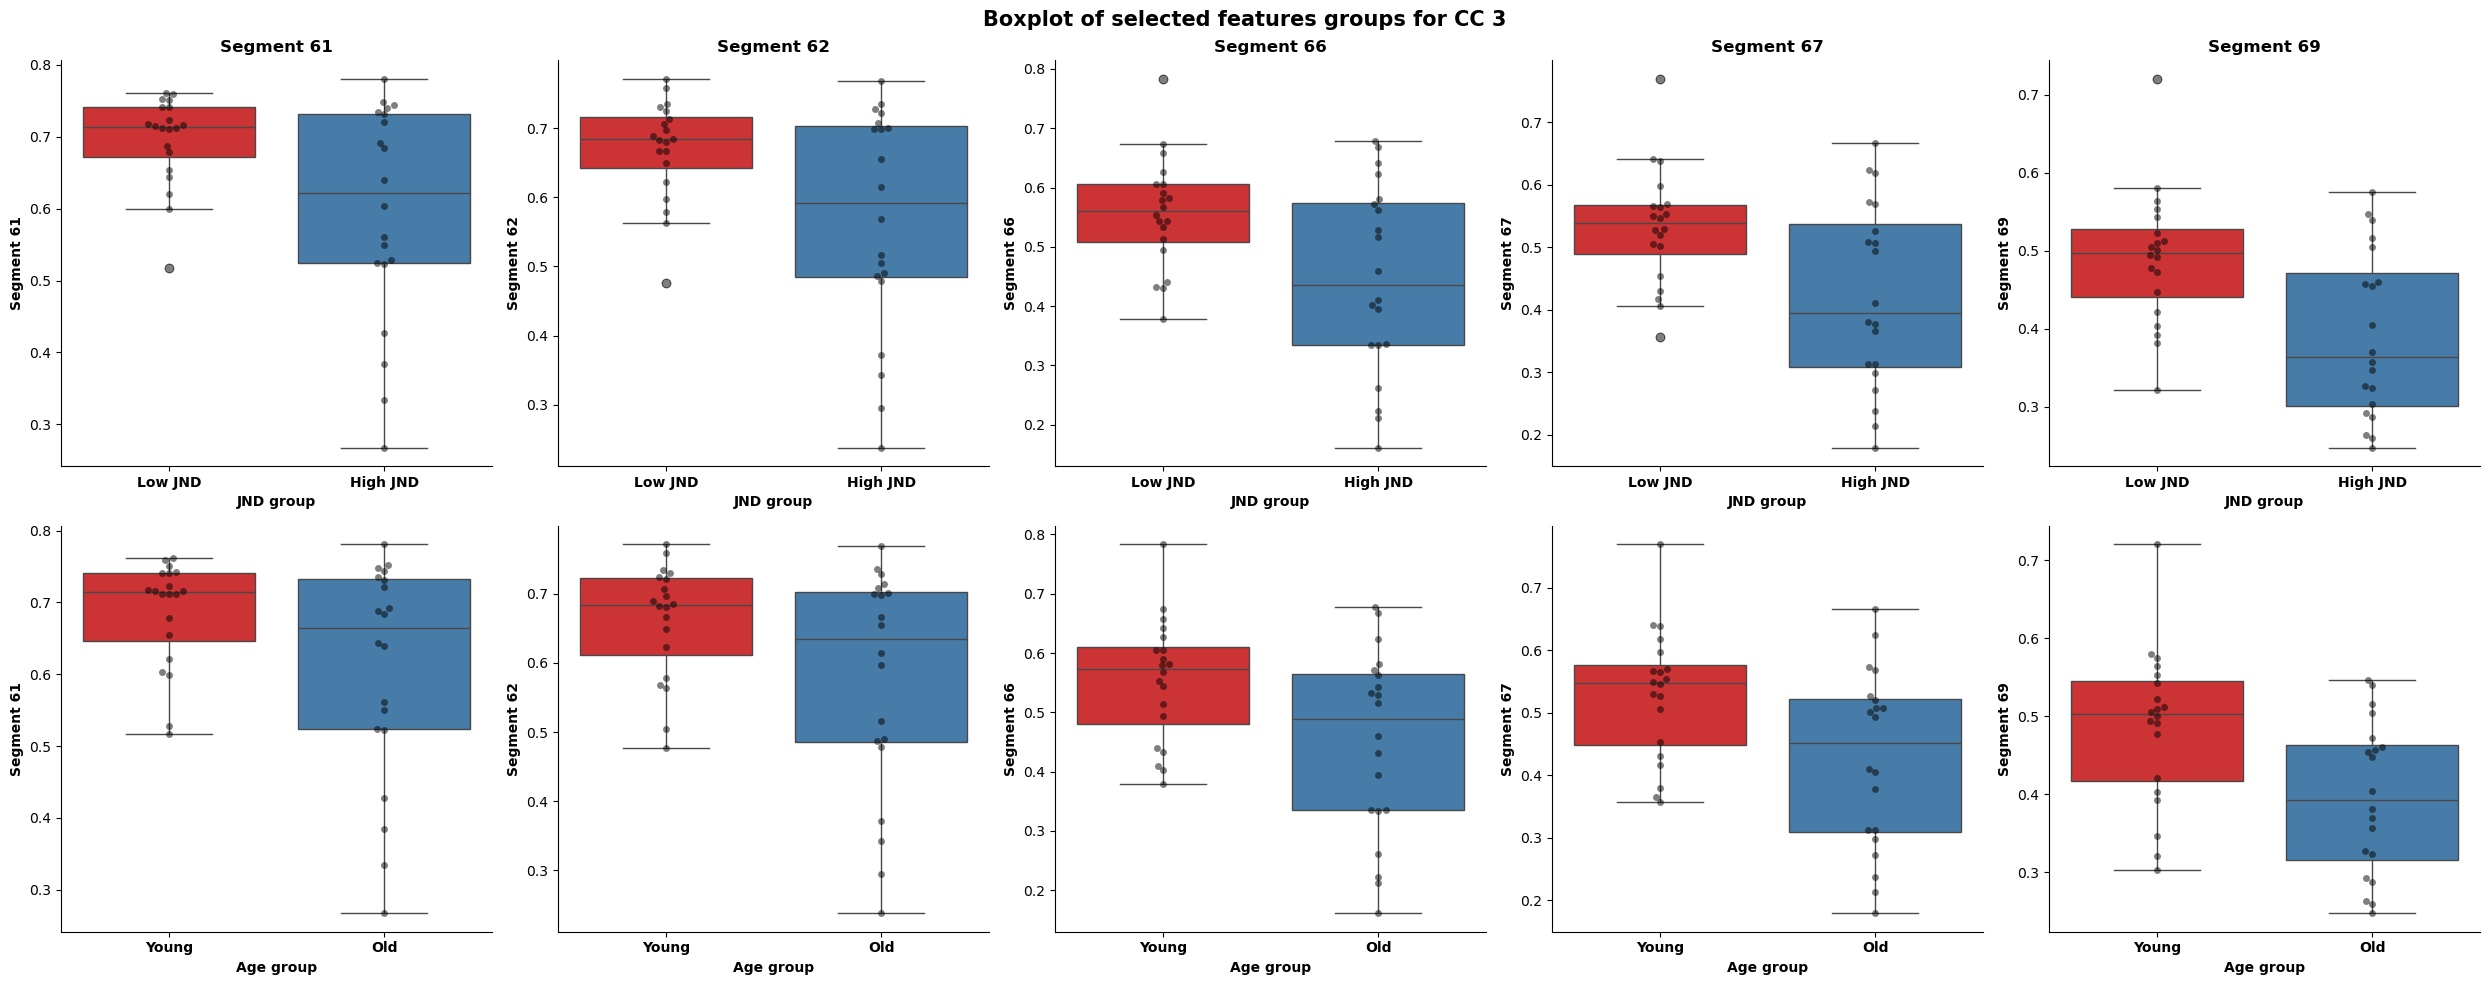

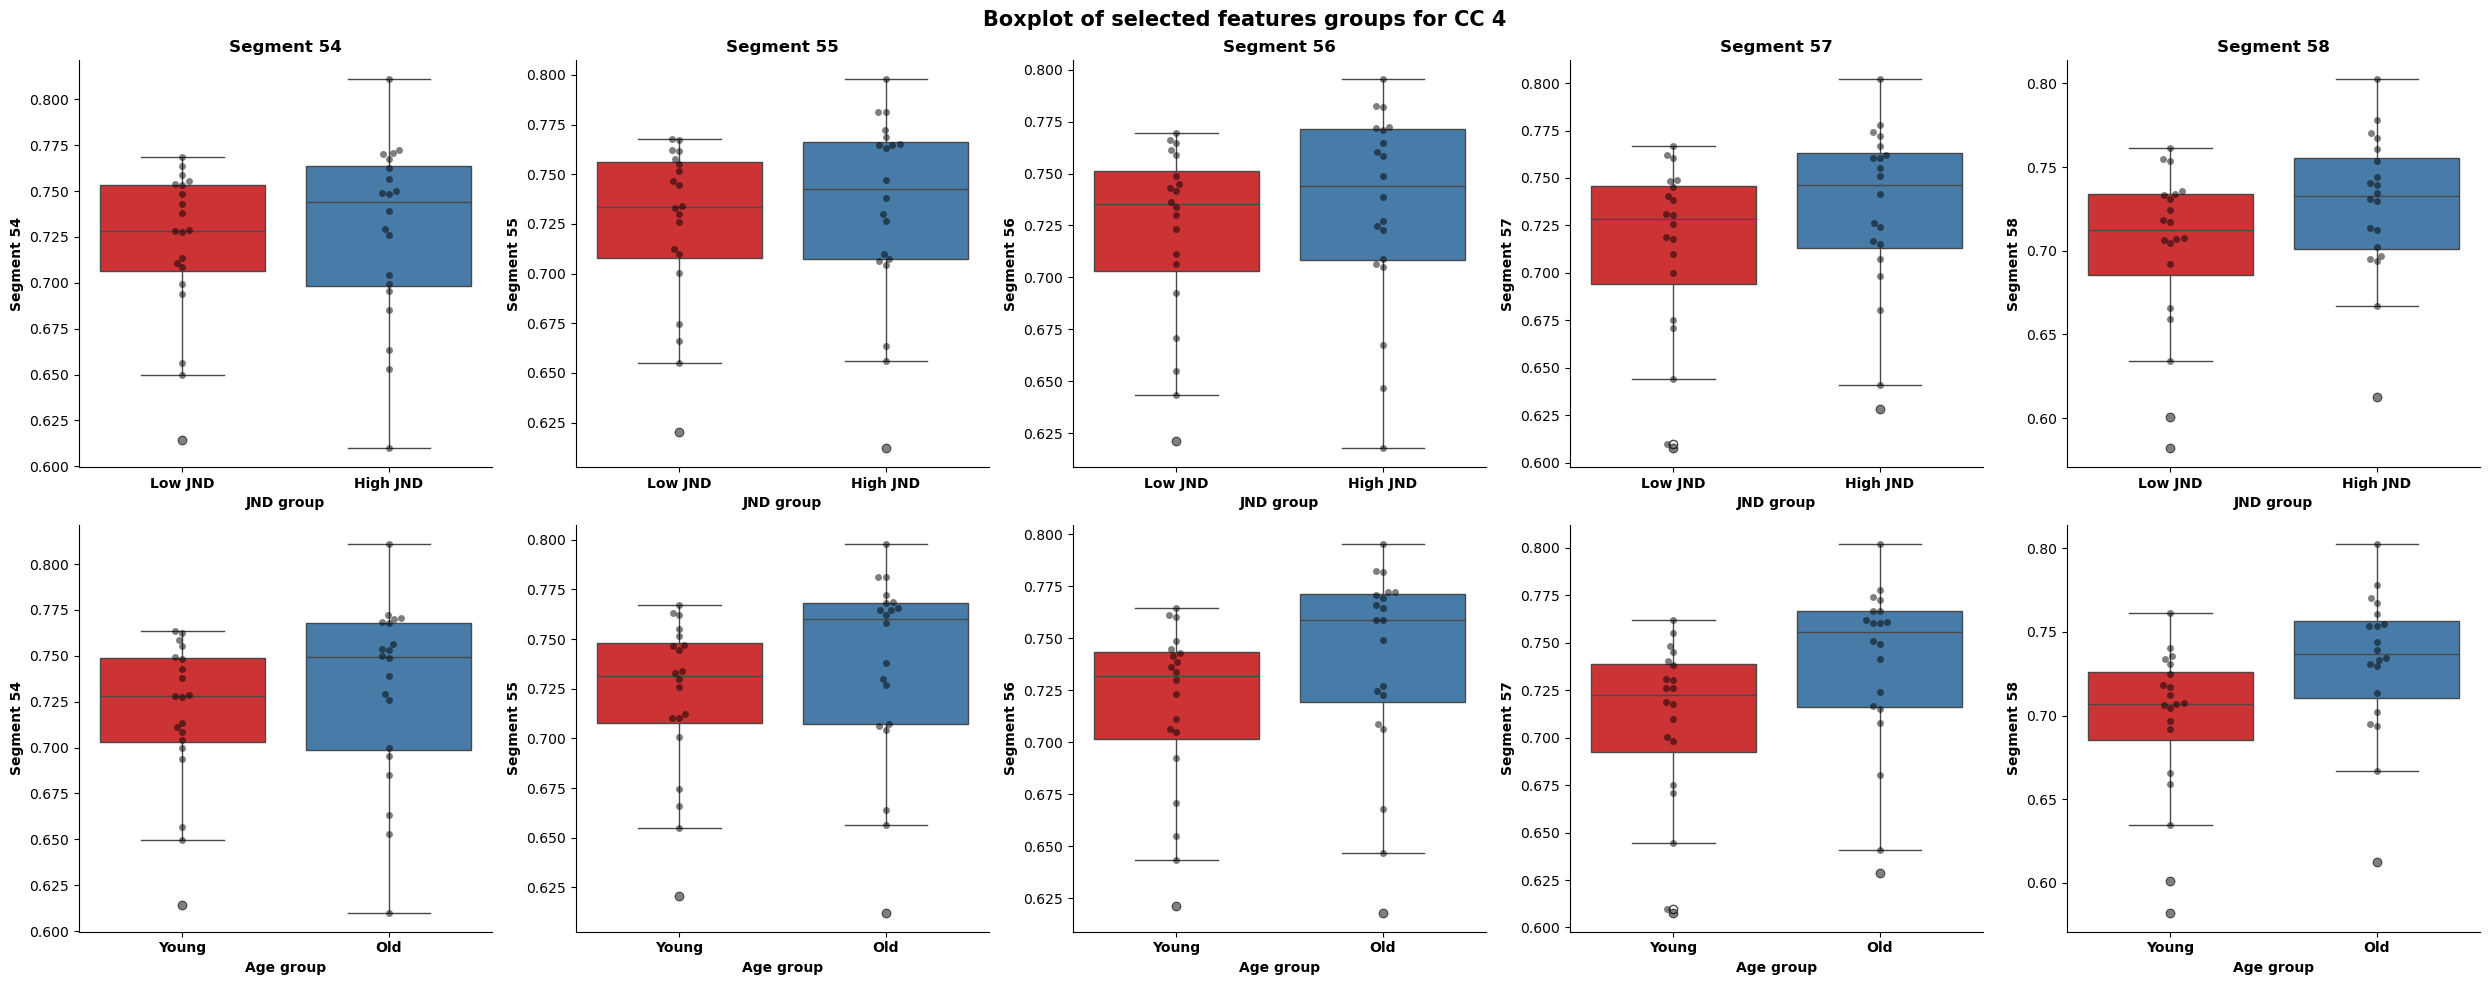

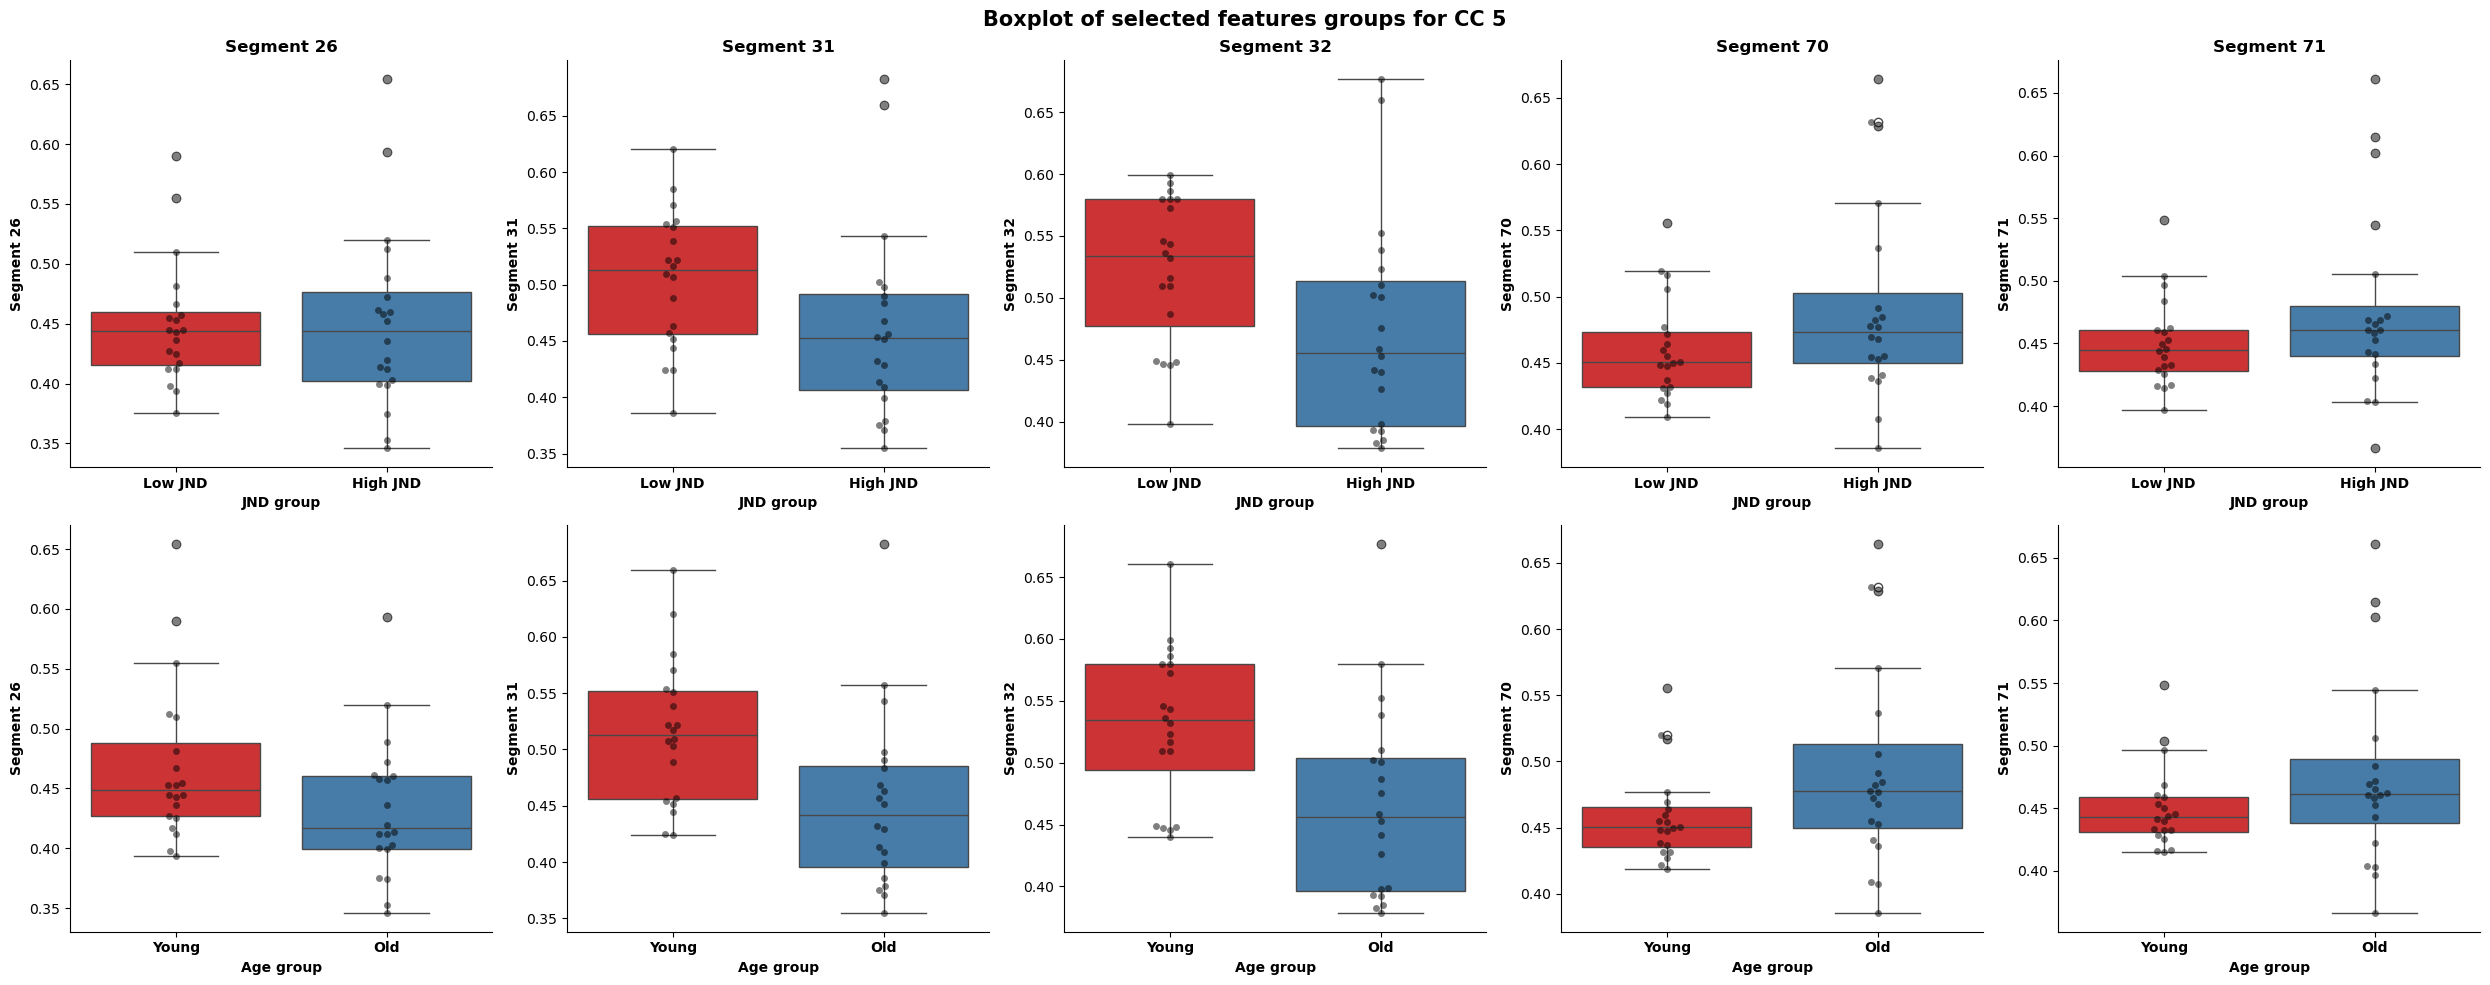

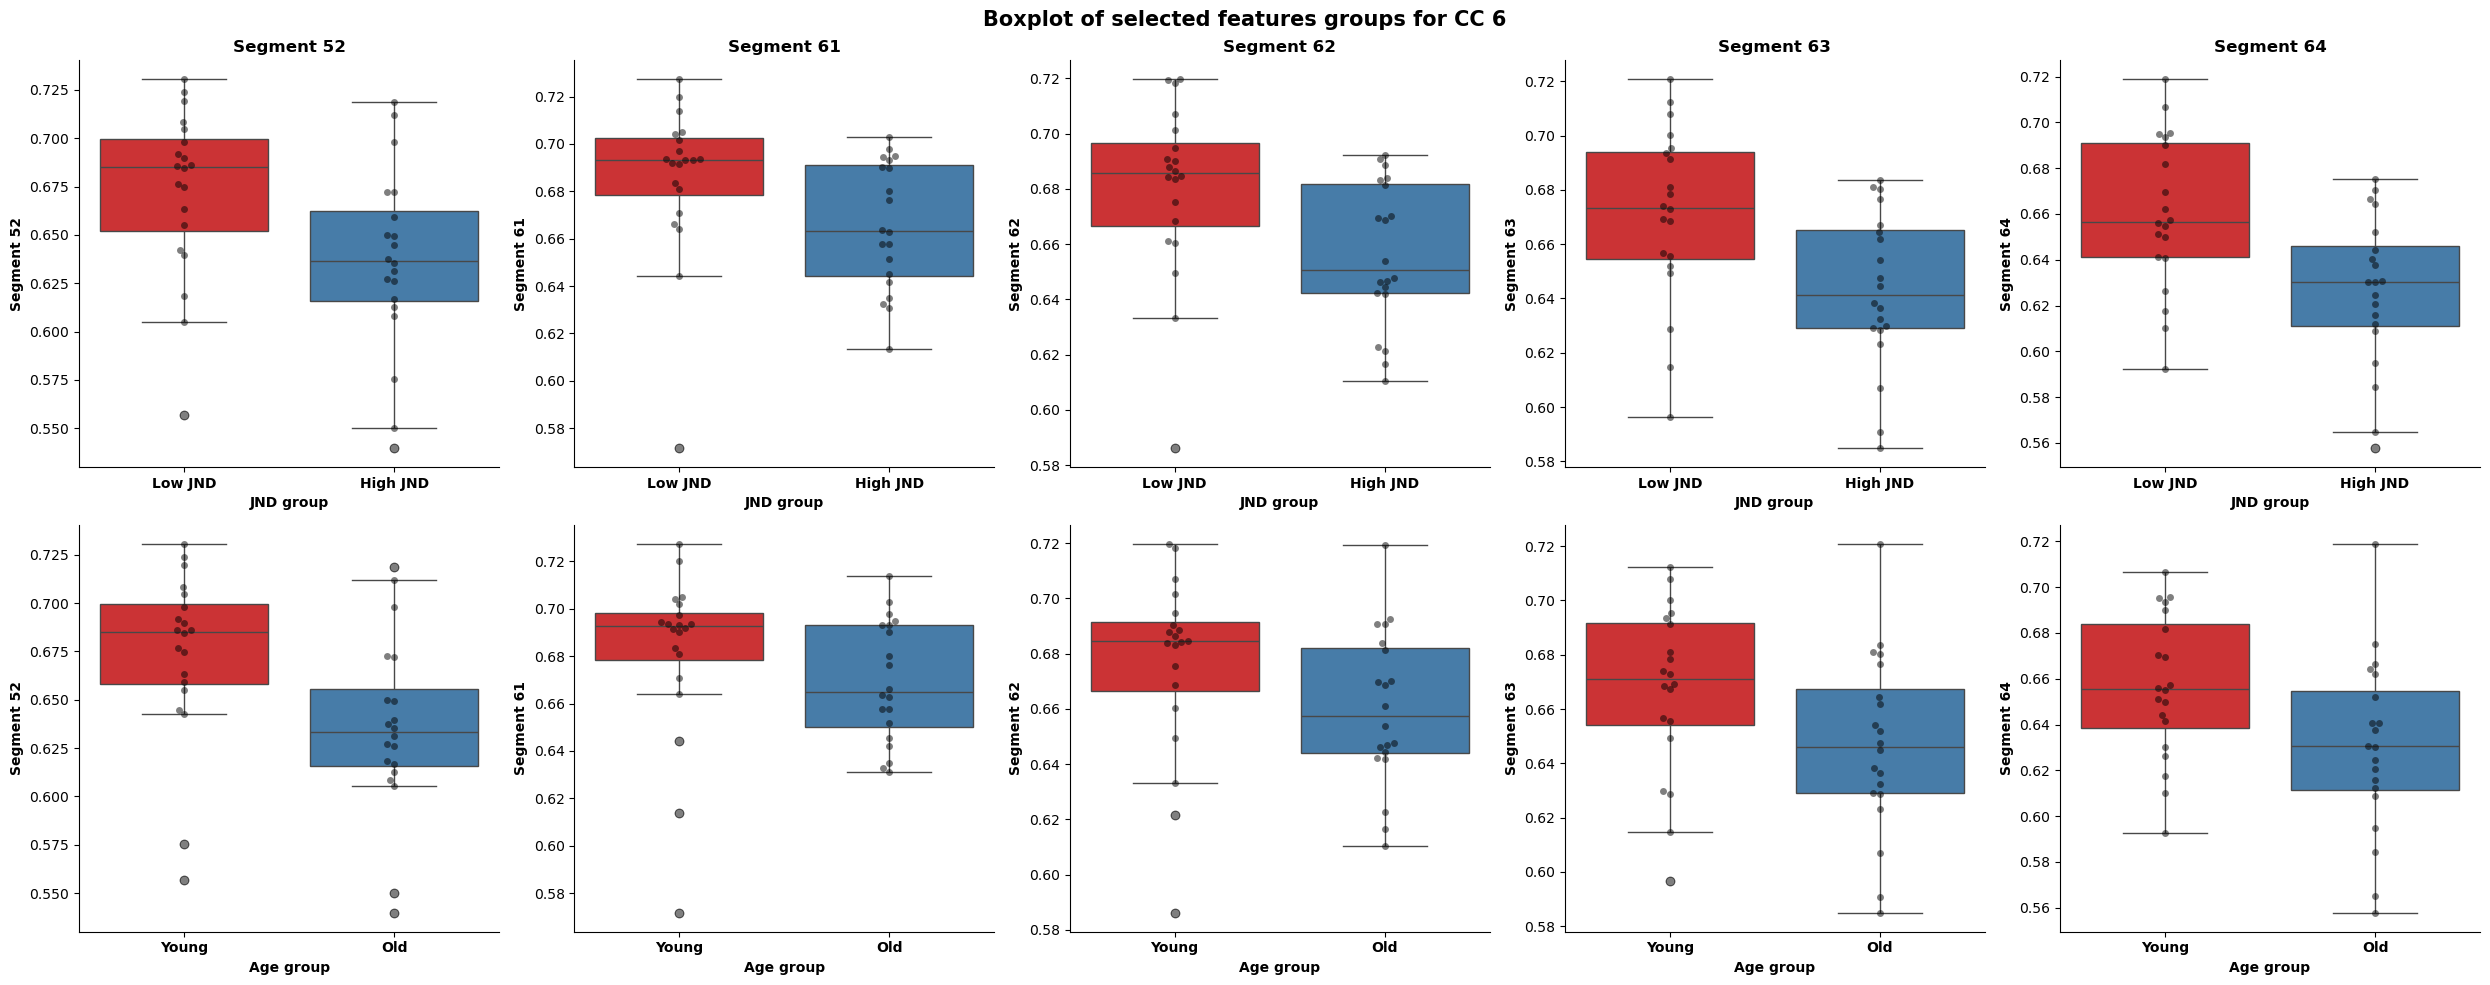

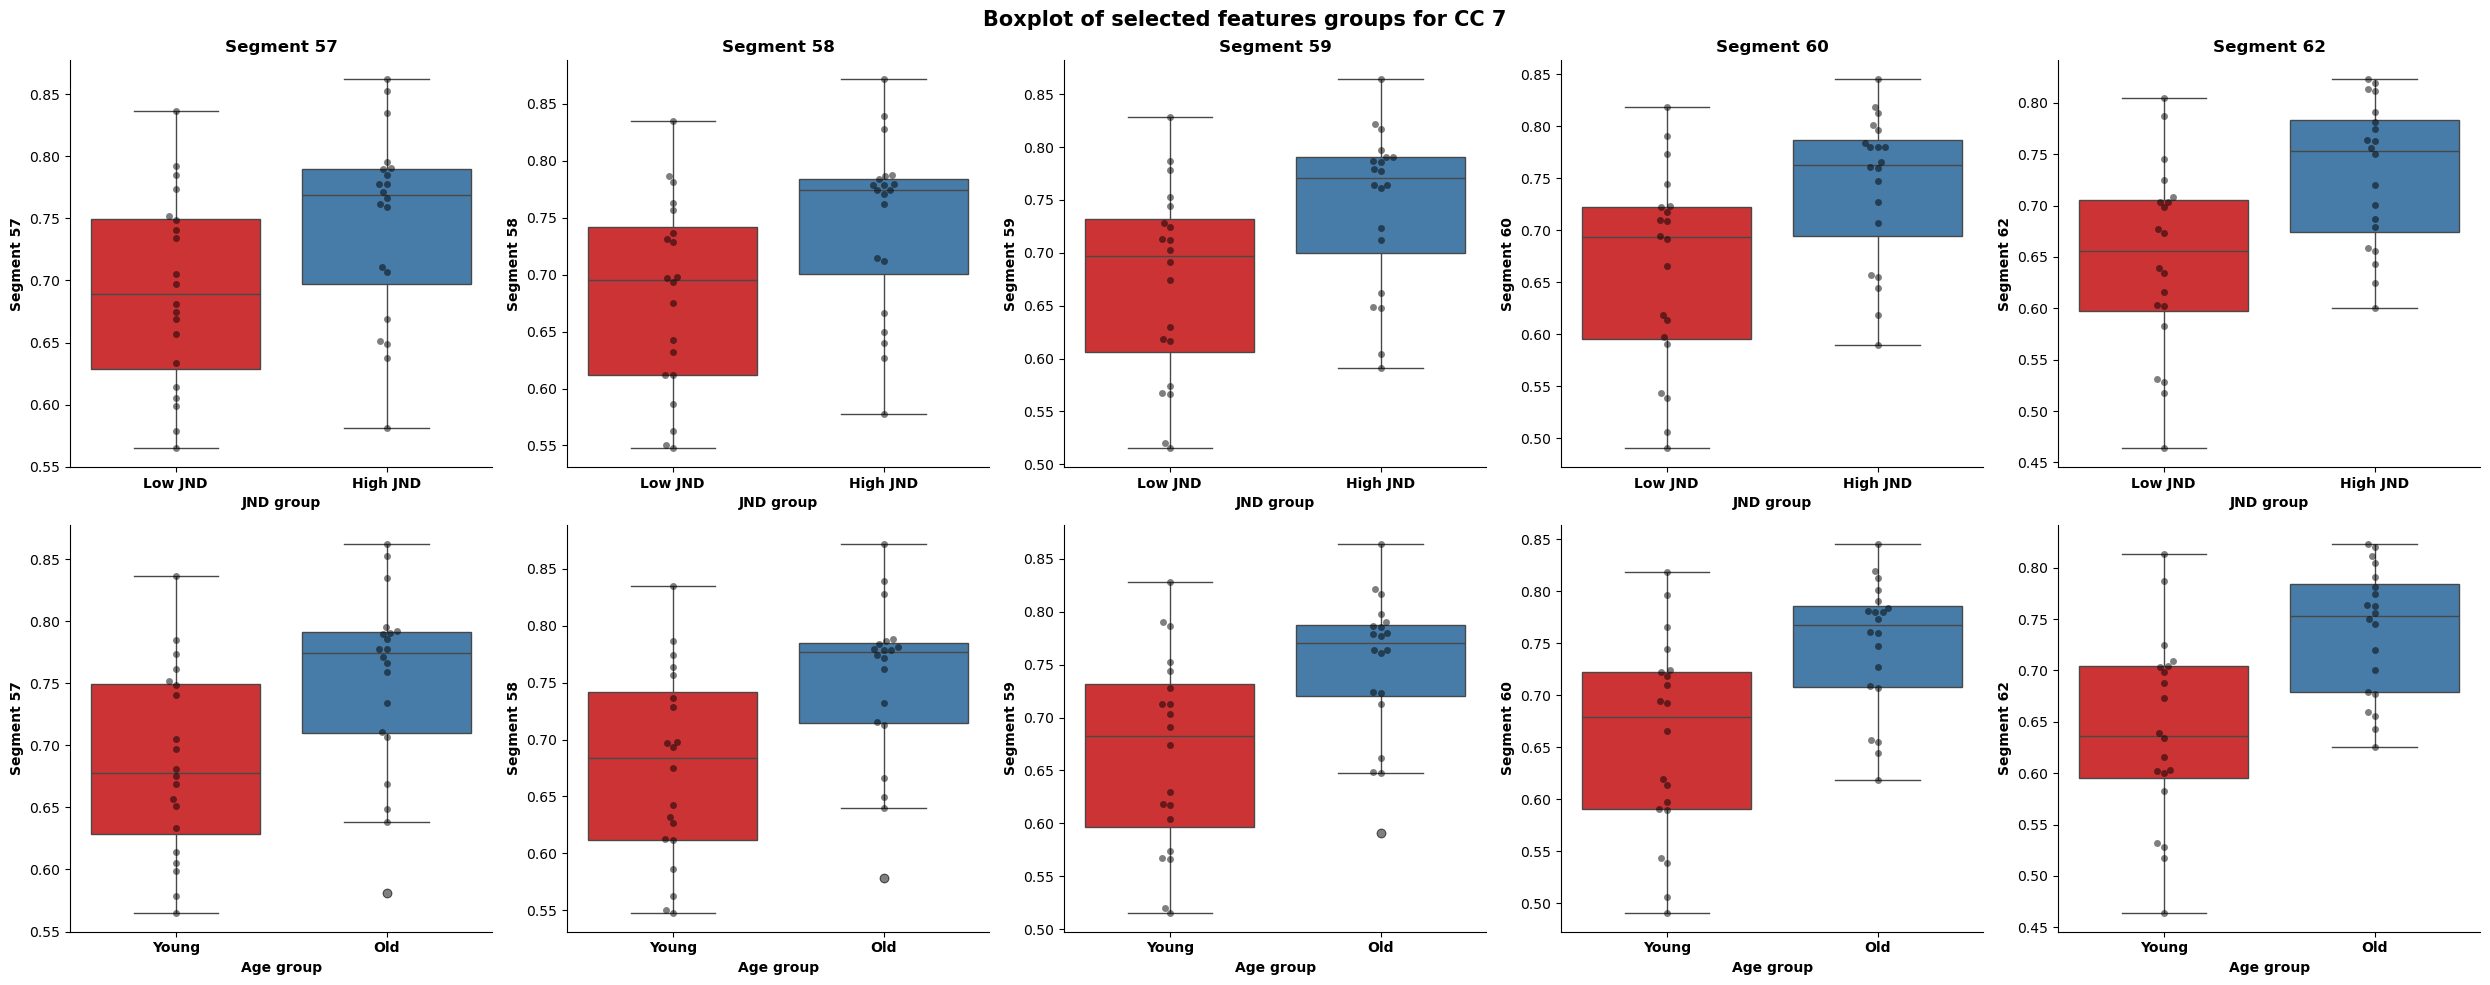

In [48]:


for CC in range(1,8):

    dataRaw=dataDTIallCC[CC-1]
    list_of_selfeatures=list_of_selfeaturesallCC[CC-1][nFeatures]
    data=pd.concat([dataRaw.loc[:,list_of_selfeatures], SubjectTable], axis=1)

    SelectedFeat=list_of_selfeatures


    fig, ax = plt.subplots(2, nFeatures, figsize=(25, 10))
    subpl=0


    for segment in SelectedFeat:
        ayid=0
        sns.boxplot(x='JND_group', y=segment, data=data,  ax=ax[ayid,subpl], palette='Set1')
        sns.swarmplot(x='JND_group', y=segment, data=data, color='black', alpha=0.5, ax=ax[ayid,subpl])
        ax[ayid,subpl].set_title('Segment ' + segment,weight='bold')
        ax[ayid,subpl].set_xlabel('JND group',weight='bold')
        ax[ayid,subpl].set_ylabel('Segment ' + str(segment),weight='bold')
        ax[ayid,subpl].spines['top'].set_visible(False)
        ax[ayid,subpl].spines['right'].set_visible(False)
        ax[ayid,subpl].set_xticklabels(['Low JND','High JND'],weight='bold')

        ayid=1
        sns.boxplot(x='group', y=segment, data=data,  ax=ax[ayid,subpl], palette='Set1')
        sns.swarmplot(x='group', y=segment, data=data, color='black', alpha=0.5, ax=ax[ayid,subpl])
        ax[ayid,subpl].set_xlabel('Age group',weight='bold')

        ax[ayid,subpl].set_ylabel('Segment ' + str(segment),weight='bold')
        ax[ayid,subpl].spines['top'].set_visible(False)
        ax[ayid,subpl].spines['right'].set_visible(False)
        ax[ayid,subpl].set_xticklabels(['Young','Old'],weight='bold')
        subpl=subpl+1

    fig.suptitle('Boxplot of selected features groups for CC ' + str(CC), fontsize=15, fontweight='bold')
    plt.tight_layout()

    plt.savefig(os.path.join(pathsavefigure,'CC_' +str(CC)+'_nfeat_'+str(nFeatures)+' '+addtocc+'_figure3' '.pdf'), dpi=300, bbox_inches='tight')

    plt.show()



In [49]:
SubjectTable

,sub,age,JND_P,group_O,group_Y,group,sex,JND_group
0,1.0,25.0,9.560000,0.0,1.0,Y,F,1
1,2.0,27.0,6.690000,0.0,1.0,Y,M,0
2,3.0,28.0,12.920000,0.0,1.0,Y,F,1
3,5.0,21.0,1.950000,0.0,1.0,Y,F,0
4,6.0,25.0,2.540000,0.0,1.0,Y,F,0
5,8.0,67.0,4.480000,1.0,0.0,O,F,0
6,9.0,73.0,9.630000,1.0,0.0,O,M,1
7,10.0,64.0,7.270000,1.0,0.0,O,F,1
8,11.0,21.0,1.620000,0.0,1.0,Y,F,0
9,12.0,21.0,3.680000,0.0,1.0,Y,M,0


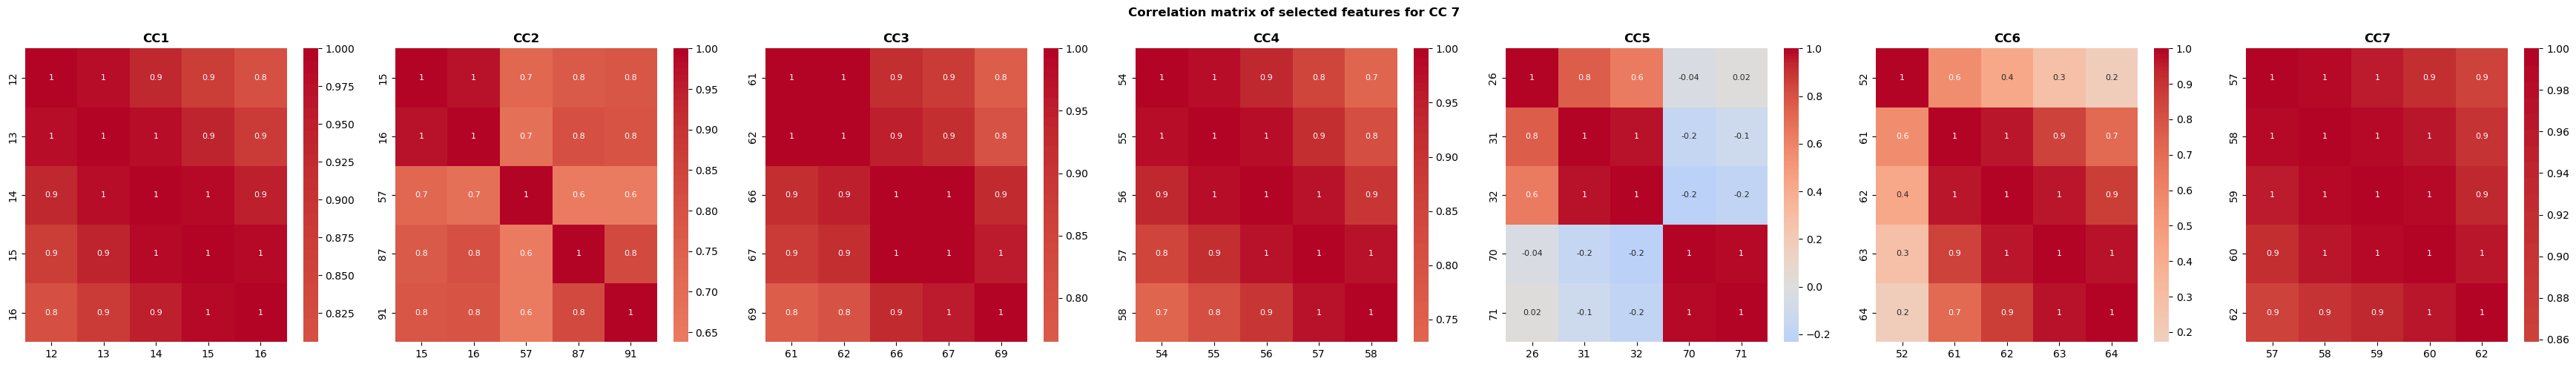

In [50]:
fig, axs = plt.subplots(1, 7, figsize=(35, 5))

for CC in range(1,8):

    dataRaw=dataDTIallCC[CC-1]
    list_of_selfeatures=list_of_selfeaturesallCC[CC-1][nFeatures]
    data=pd.concat([dataRaw.loc[:,list_of_selfeatures], SubjectTable], axis=1)
    dataCorrmat=data.drop(['sub','sex','age','group_O', 'group_Y', 'JND_group', 'group','JND_P'], axis=1)

    cont=dataCorrmat.columns
    corr_matrix=pd.DataFrame(dataCorrmat[cont],columns=cont).corr()


    sns.heatmap(corr_matrix,
            cmap='coolwarm',
            center=0,
            annot=True, annot_kws={'size': 8},
            fmt='.1g',ax=axs[CC-1])
    axs[CC-1].set_title('CC'+str(CC), fontsize=12, fontweight='bold')
    
fig.suptitle('Correlation matrix of selected features for CC '+str(CC),fontsize=12, fontweight='bold')

plt.tight_layout()

plt.savefig(os.path.join(pathsavefigure,'CorrMat_CC'+'_nfeat_'+str(nFeatures)+addtocc+'_figure4.pdf'), dpi=300, bbox_inches='tight')



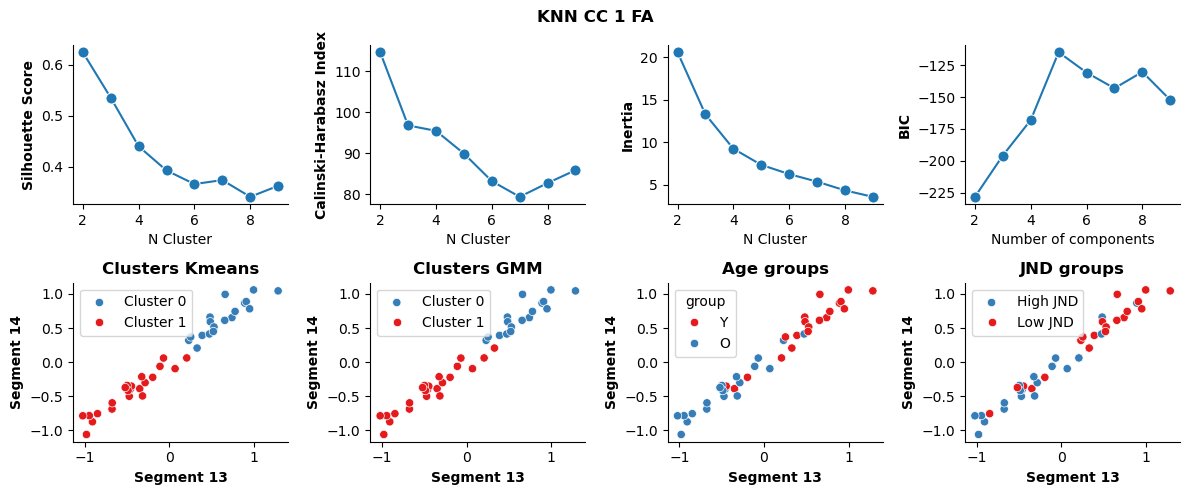

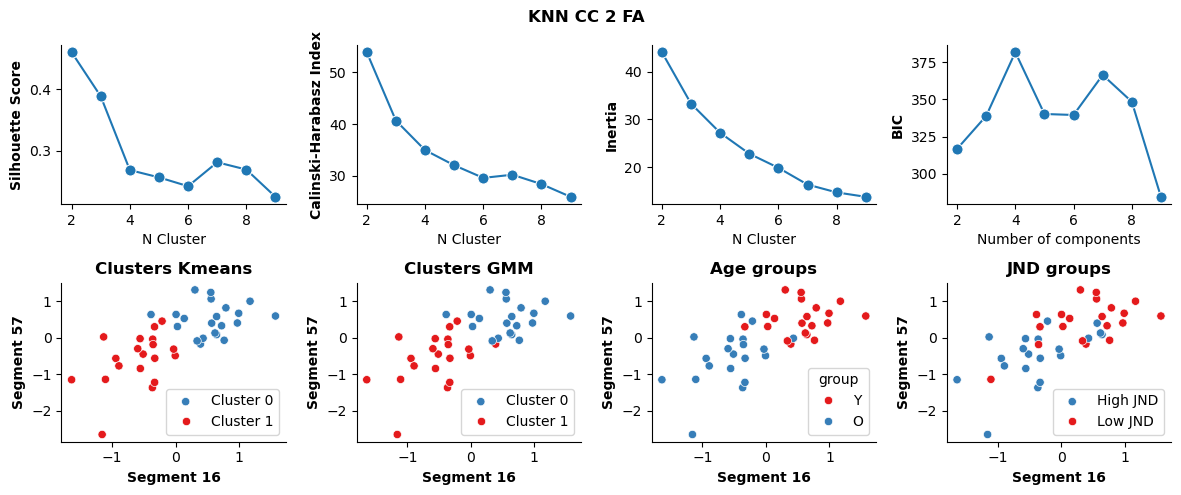

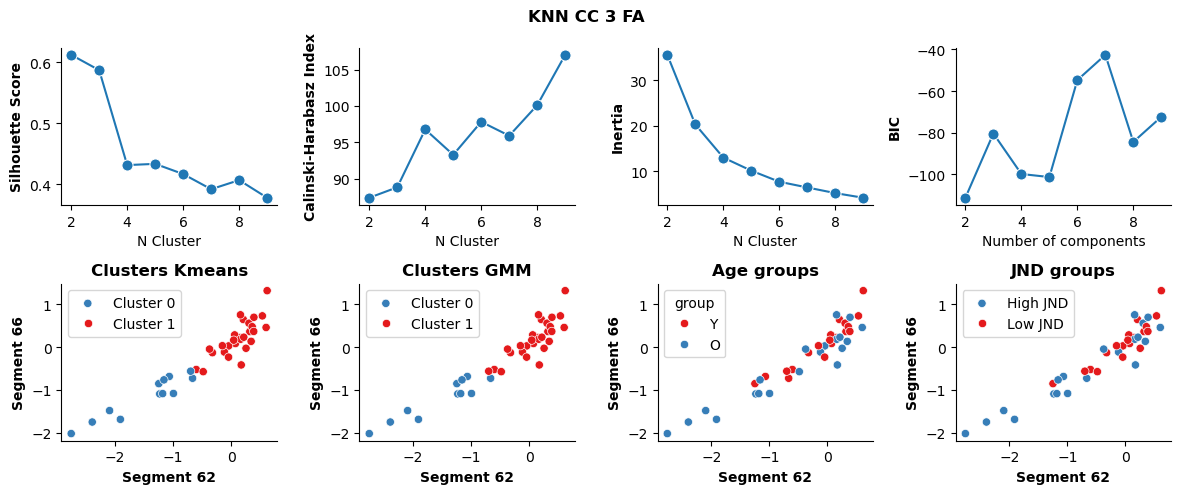

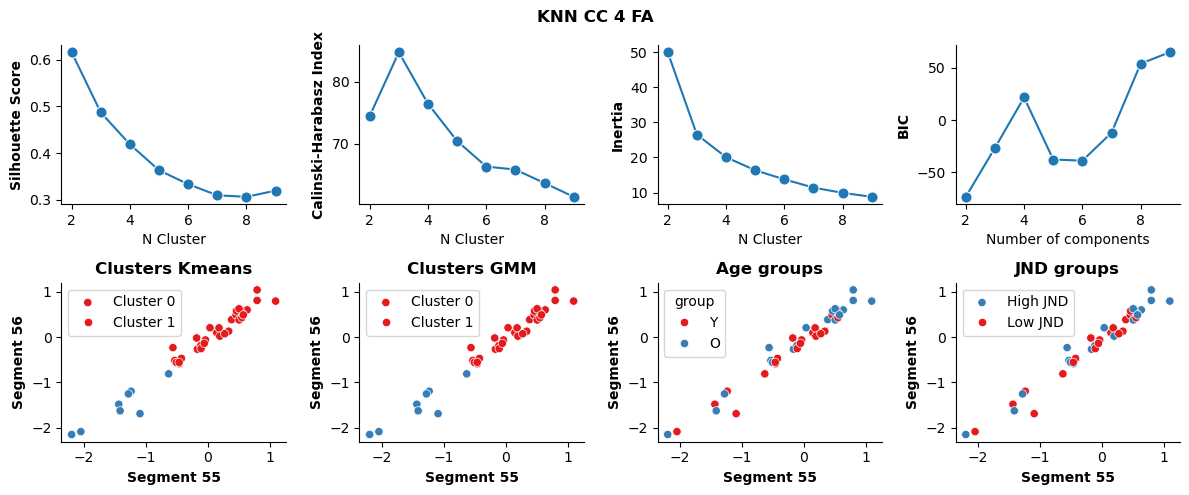

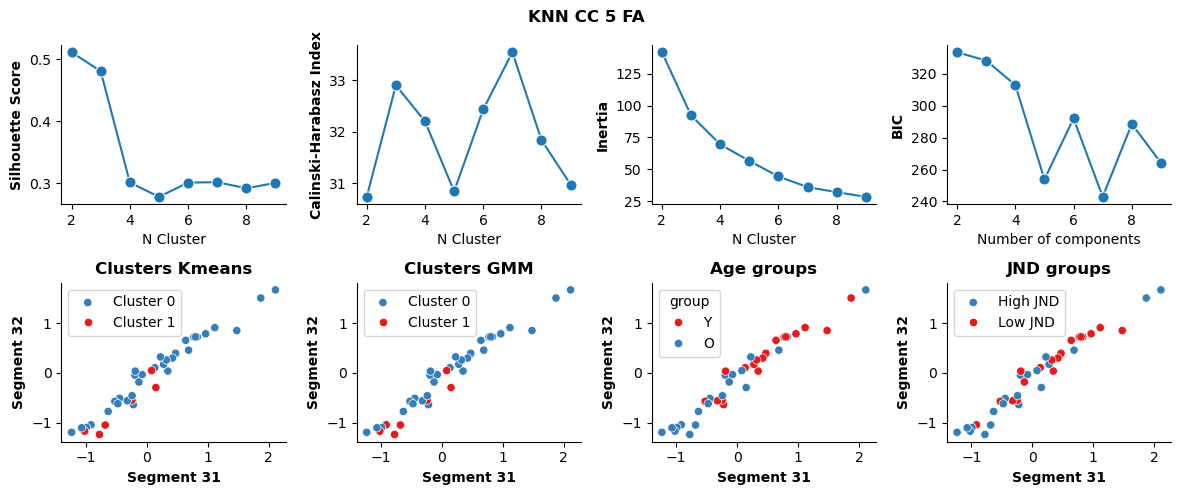

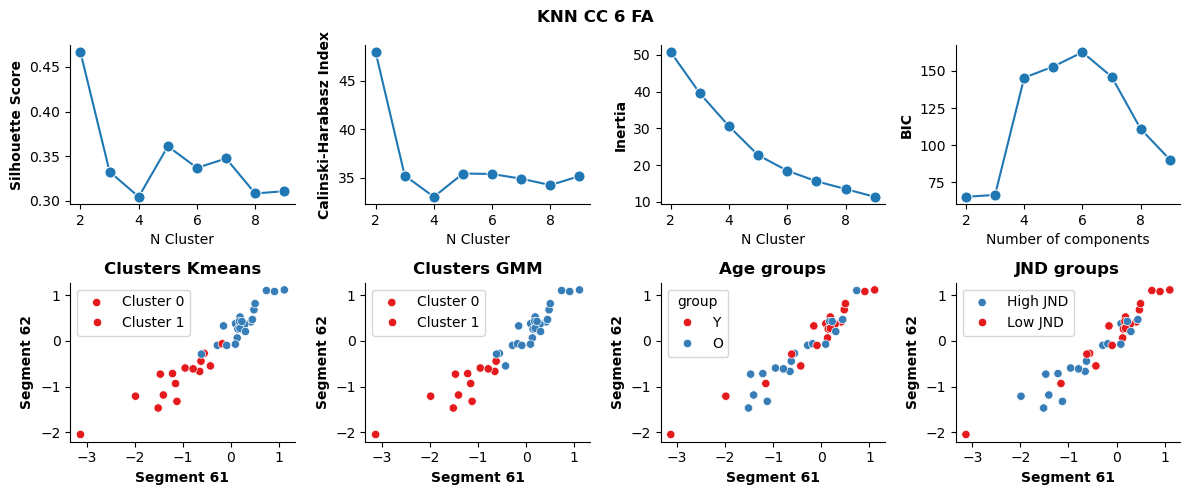

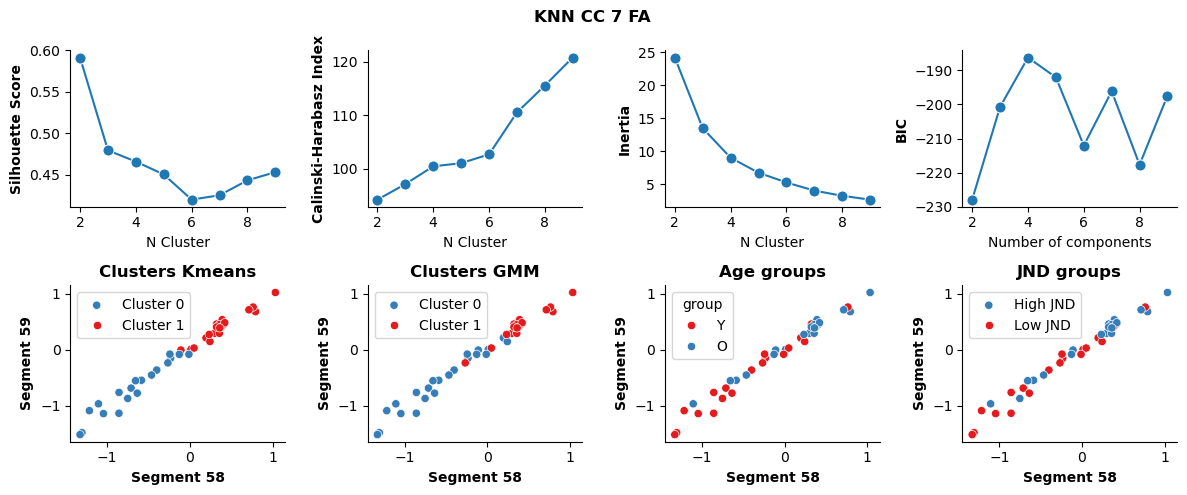

In [51]:

for CC in range(1,8):
    dataRaw=dataDTIallCC[CC-1]
    list_of_selfeatures=list_of_selfeaturesallCC[CC-1][nFeatures]
    data=pd.concat([dataRaw.loc[:,list_of_selfeatures], SubjectTable], axis=1)

    dataKmeans=data.drop(['sub','sex','age','group_O', 'group_Y', 'JND_group', 'group','JND_P'], axis=1)

    X=dataKmeans

    from sklearn.cluster import KMeans
    from sklearn.mixture import GaussianMixture
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import RobustScaler


    #SCALING using a StandardScaler
    scaler = StandardScaler()
    scaler=RobustScaler()
    Xscaled = scaler.fit_transform(X)
    Xscaled = pd.DataFrame(Xscaled, columns=X.columns)

    Xscaled.head()

    from sklearn.metrics import calinski_harabasz_score
    from sklearn.metrics import davies_bouldin_score
    from sklearn.metrics import silhouette_samples, silhouette_score

    SilScore=[]
    CalHar=[]
    bics = []
    inertia=[]

    for k in range(2,10):
        kmeans = KMeans(n_clusters=k, random_state=RandomState).fit(Xscaled)
        SilScore.append(silhouette_score(Xscaled, kmeans.fit_predict(Xscaled)))
        CalHar.append(calinski_harabasz_score(Xscaled, kmeans.labels_))
        inertia.append(kmeans.inertia_)  # Inertie (cohésion)

        gmm=GaussianMixture(n_components=k, random_state=RandomState).fit(Xscaled)
        bics.append(gmm.bic(Xscaled))

    K_range = range(2, 10)  
        
    df = pd.DataFrame({'Silhouette Score': SilScore,'Inertia': inertia,
                'Cal.-Har. Index': CalHar,'BIC': bics,'N Cluster': K_range})


    #KMEANS  
    kmeans = KMeans(n_clusters=nclust, random_state=RandomState,n_init="auto").fit(Xscaled)
    kmeans.labels_
    CenterCluster=kmeans.cluster_centers_
    labels_CC = kmeans.labels_
    data["cluster"]=labels_CC

    #GMM  
    gmm = GaussianMixture(n_components=nclust, random_state=RandomState).fit(Xscaled)
    labelsgmm_CC = gmm.predict(Xscaled)
    #data["clustergmm"]=labelsgmm_CC

    # PLOT CORRELATION MATRIX, CLUSTERS FOR A GIVEN CC (COMMON FOR ALL TARGET VAR)

    f1=list_of_selfeatures[1]
    f2=list_of_selfeatures[2]

    # PLOT  Evaluation CLUSTERS 

    fig, ax = plt.subplots(2, 4, figsize=(12, 5))

    axid=0
    ayid=0
    sns.lineplot(ax=ax[ayid,axid],data=df, y='Silhouette Score', x='N Cluster', marker='o',markersize=8)
    ax[ayid,axid].spines[['right', 'top']].set_visible(False)
    ax[ayid,axid].set_ylabel('Silhouette Score',weight='bold')


    axid=1
    sns.lineplot(ax=ax[ayid,axid],data=df, x='N Cluster', y='Cal.-Har. Index', marker='o',markersize=8)
    ax[ayid,axid].spines[['right', 'top']].set_visible(False)
    ax[ayid,axid].set_ylabel('Calinski-Harabasz Index',weight='bold')


    axid=2
    sns.lineplot(ax=ax[ayid,axid],data=df, x='N Cluster', y='Inertia', marker='o',markersize=8)
    ax[ayid,axid].spines[['right', 'top']].set_visible(False)
    ax[ayid,axid].set_ylabel('Inertia',weight='bold')


    axid=3
    sns.lineplot(ax=ax[ayid,axid],data=df, x='N Cluster', y='BIC', marker='o',markersize=8)
    ax[ayid,axid].spines[['right', 'top']].set_visible(False)
    ax[ayid,axid].set_xlabel('Number of components')
    ax[ayid,axid].set_ylabel('BIC',weight='bold')


    # PLOT 2D CLUSTERS

    #plot kmeans
    ayid=1
    axid=0
    sns.scatterplot(ax=ax[ayid,axid],data=Xscaled, x=f1, y=f2,hue=labels_CC,palette='Set1')
    ax[ayid,axid].spines[['right', 'top']].set_visible(False)
    ax[ayid,axid].set_title('Clusters Kmeans', fontsize=12, fontweight='bold')
    ax[ayid,axid].set_ylabel('Segment ' + str(f2),weight='bold')
    ax[ayid,axid].set_xlabel('Segment ' + str(f1),weight='bold')
    ax[ayid,axid].legend(['Cluster 0','Cluster 1'])

    #plot GMM
    axid=1
    sns.scatterplot(ax=ax[ayid,axid],data=Xscaled, x=f1, y=f2,hue=labelsgmm_CC,palette='Set1')
    ax[ayid,axid].spines[['right', 'top']].set_visible(False)
    ax[ayid,axid].set_title('Clusters GMM', fontsize=12, fontweight='bold')
    ax[ayid,axid].set_ylabel('Segment ' + str(f2),weight='bold')
    ax[ayid,axid].set_xlabel('Segment ' + str(f1),weight='bold')
    ax[ayid,axid].legend(['Cluster 0','Cluster 1'])


    axid=2
    sns.scatterplot(ax=ax[ayid,axid],data=Xscaled, x=f1, y=f2,hue=SubjectTable["group"],palette='Set1',legend='full')
    ax[ayid,axid].spines[['right', 'top']].set_visible(False)
    ax[ayid,axid].set_title('Age groups', fontsize=12, fontweight='bold')
    ax[ayid,axid].set_ylabel('Segment ' + str(f2),weight='bold')
    ax[ayid,axid].set_xlabel('Segment ' + str(f1),weight='bold')

    axid=3
    sns.scatterplot(ax=ax[ayid,axid],data=Xscaled, x=f1, y=f2,hue=SubjectTable["JND_group"],palette='Set1')
    ax[ayid,axid].spines[['right', 'top']].set_visible(False)
    ax[ayid,axid].set_title('JND groups', fontsize=12, fontweight='bold')
    ax[ayid,axid].set_ylabel('Segment ' + str(f2),weight='bold')
    ax[ayid,axid].set_xlabel('Segment ' + str(f1),weight='bold')

    ax[ayid,axid].legend(['High JND','Low JND'])


    fig.suptitle('KNN CC '+str(CC)+' '+dti_metric , fontsize=12, fontweight='bold')

    plt.tight_layout()


    plt.savefig(os.path.join(pathsavefigure,'Clustering_CC_' +str(CC)+'_nfeat_'+str(nFeatures)+addtocc+'_figure5.pdf'), dpi=300, bbox_inches='tight')








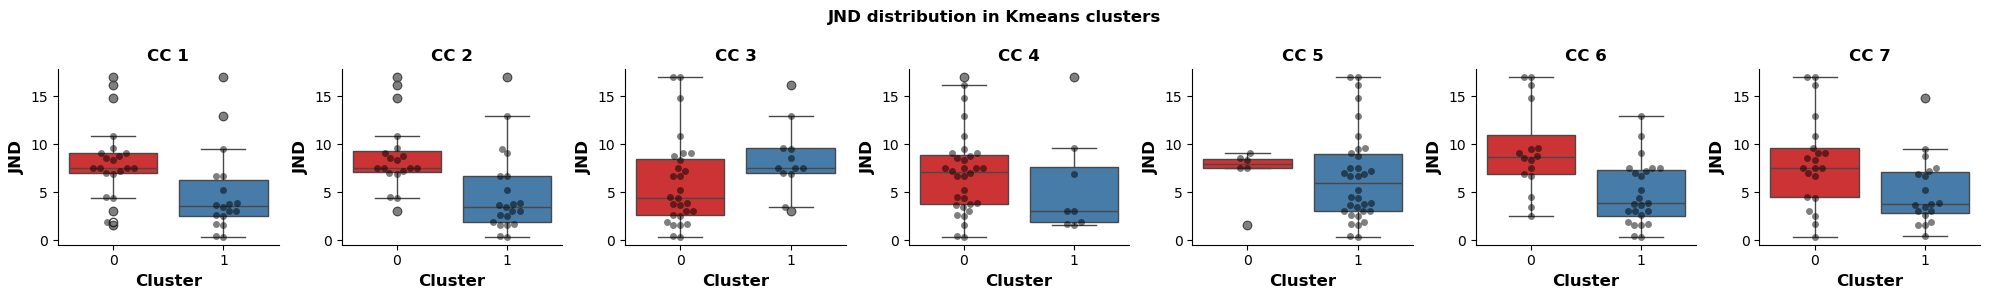

In [52]:
fig, axs = plt.subplots(1, 7, figsize=(20, 3))

for CC in range(1,8):
    dataRaw=dataDTIallCC[CC-1]
    list_of_selfeatures=list_of_selfeaturesallCC[CC-1][nFeatures]
    data=pd.concat([dataRaw.loc[:,list_of_selfeatures], SubjectTable], axis=1)

    dataKmeans=data.drop(['sub','sex','age','group_O', 'group_Y', 'JND_group', 'group','JND_P'], axis=1)

    X=dataKmeans

    #SCALING using a StandardScaler
    scaler = RobustScaler()
    Xscaled = scaler.fit_transform(X)
    Xscaled = pd.DataFrame(Xscaled, columns=X.columns)

    Xscaled.head()
     #KMEANS  
    kmeans = KMeans(n_clusters=nclust, random_state=RandomState,n_init="auto").fit(Xscaled)
    kmeans.labels_
    CenterCluster=kmeans.cluster_centers_
    labels_CC = kmeans.labels_
    data["cluster"]=labels_CC

    sns.boxplot(x='cluster', y='JND_P', data=data,  palette='Set1',ax=axs[CC-1])
    sns.swarmplot(x='cluster', y='JND_P', data=data, color='black', alpha=0.5,ax=axs[CC-1])
    axs[CC-1].set_title('CC '+str(CC), fontsize=12, fontweight='bold')
    axs[CC-1].set_xlabel('Cluster', fontsize=12, fontweight='bold')
    axs[CC-1].set_ylabel('JND', fontsize=12, fontweight='bold')
    axs[CC-1].spines['top'].set_visible(False)
    axs[CC-1].spines['right'].set_visible(False)
   
    fig.suptitle('JND distribution in Kmeans clusters', fontsize=12, fontweight='bold')

    plt.tight_layout()

plt.savefig(os.path.join(pathsavefigure,'JND_Dsitrib_KmeansClustering' +'_nfeat_'+str(nFeatures)+addtocc+'_figure6.pdf'), dpi=300, bbox_inches='tight')


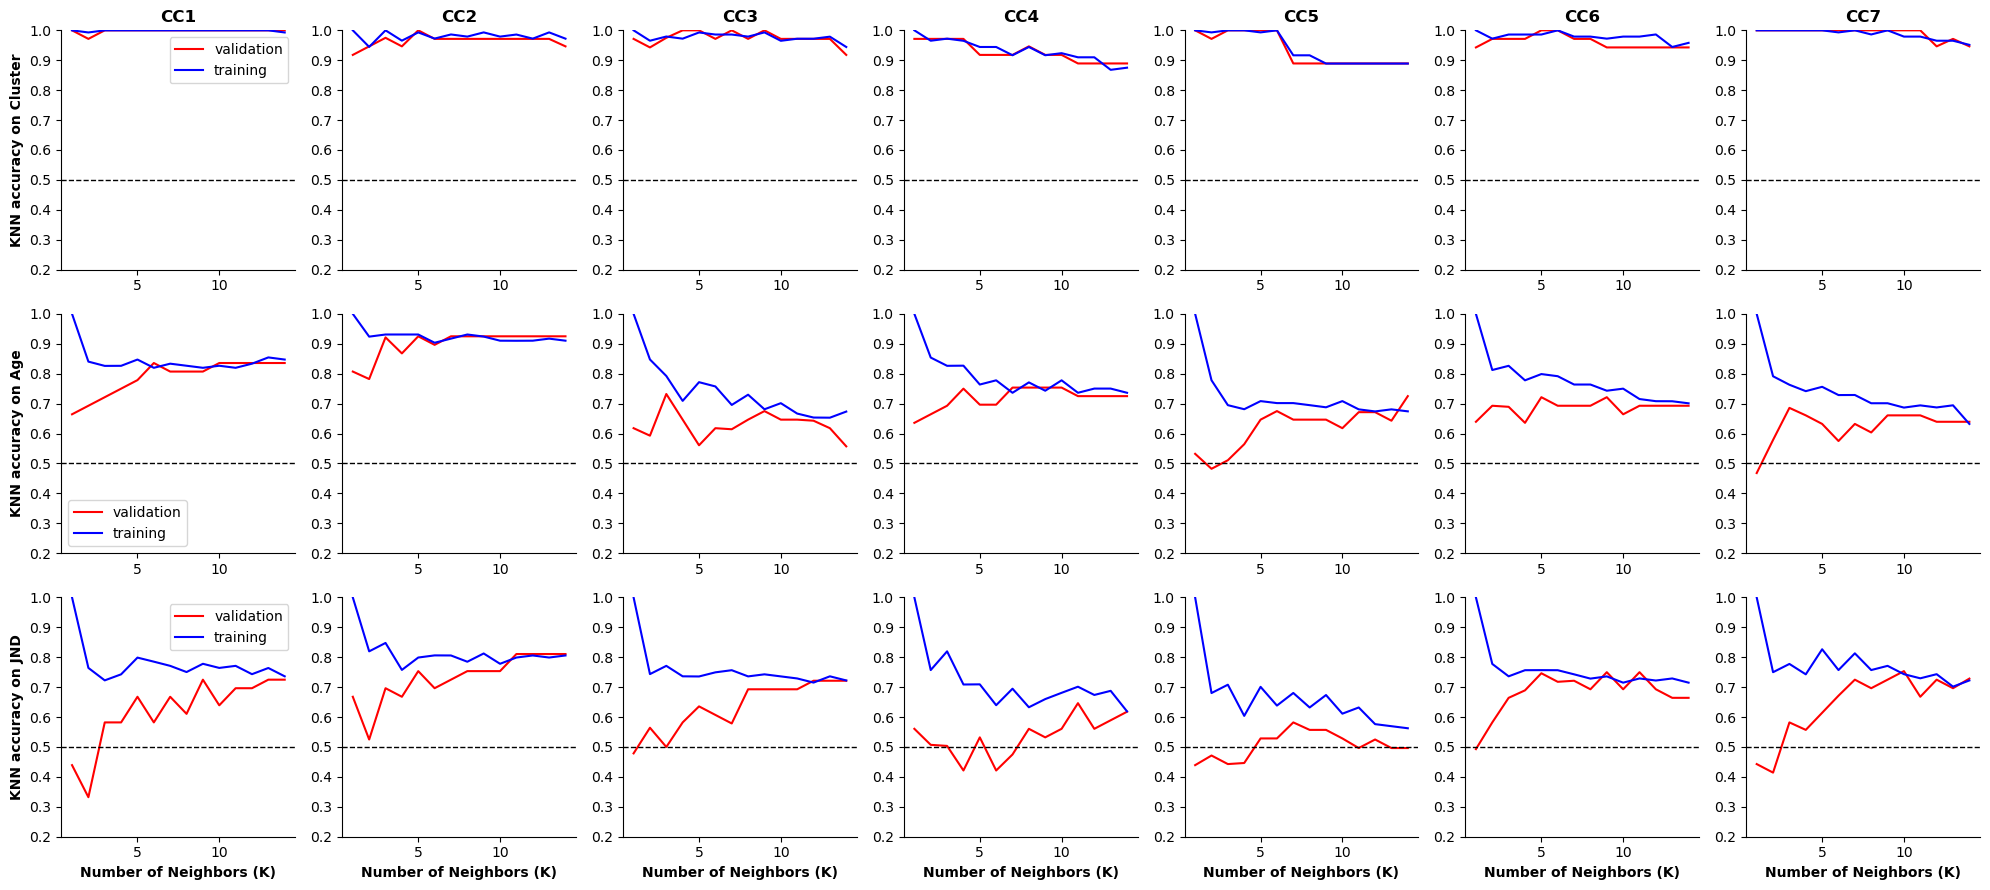

In [53]:

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, roc_auc_score)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

from sklearn.model_selection import GridSearchCV






fig, axs = plt.subplots(3, 7, figsize=(20,9))
labels_all_CC=[]
for CC in range(0,7):


    dataRaw=dataDTIallCC[CC]
    list_of_selfeatures=list_of_selfeaturesallCC[CC][nFeatures]
    data=pd.concat([dataRaw.loc[:,list_of_selfeatures], SubjectTable], axis=1)

    dataKmeans=data.drop(['sub','sex','age','group_O', 'group_Y', 'JND_group', 'group','JND_P'], axis=1)

    ############################################
    X=dataKmeans
    scaler = RobustScaler()
    Xscaled = scaler.fit_transform(X)
    Xscaled = pd.DataFrame(Xscaled, columns=X.columns)

    #KMEANS  
    kmeans = KMeans(n_clusters=nclust,n_init="auto").fit(Xscaled)
    labels_CC = kmeans.labels_
    data["cluster"]=labels_CC

    labels_all_CC.append(labels_CC)




    for targetVar in [0,1,2]:


        #for targetVar in [0,1,2]:



        if targetVar==1:
            targetVarStr='Age'
            Y_group=data["group_Y"] 
            targetnames=['Y','O']
        elif targetVar==2:
            Y_group=data["JND_group"] 
            targetVarStr='JND'
            targetnames=['0','1']   
        elif targetVar==0:
            targetVarStr='Cluster'
            targetnames=['1','2']   
            Y_group=data["cluster"] 

        y=Y_group

        # split into inputs and outputs
        X, y = Xscaled.values, y

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=knn_test_size,random_state=0)
        cv=5
        # create model
        model=KNeighborsClassifier()
        k=np.arange(1,15)
        train_scores, val_score = validation_curve(model, X_train, y_train, param_name="n_neighbors", param_range=k, cv=cv)
        axs1= axs[targetVar,CC]
        axs1.plot(k,val_score.mean(axis=1),label='validation',color='red')
        axs1.plot(k,train_scores.mean(axis=1),label='training',color='blue')
        if targetVar==2:
            axs1.set_xlabel('Number of Neighbors (K)', fontsize=10, fontweight='bold')
        if CC==0:
            axs1.set_ylabel('KNN accuracy on '+targetVarStr, fontsize=10, fontweight='bold')
            axs1.legend()

        if targetVar==0:
            axs1.set_title('CC'+str(CC+1), fontsize=12, fontweight='bold')
        axs1.set_ylim(0.2,1)
        axs1.spines['top'].set_visible(False)
        axs1.spines['right'].set_visible(False)
        axs1.axhline(y=0.5, color='k', linestyle='--', linewidth=1)
        

plt.tight_layout()

plt.savefig(os.path.join(pathsavefigure,'ValidationCurvesKNN' +'_nfeat_'+str(nFeatures)+addtocc+'_figure7.pdf'), dpi=300, bbox_inches='tight')



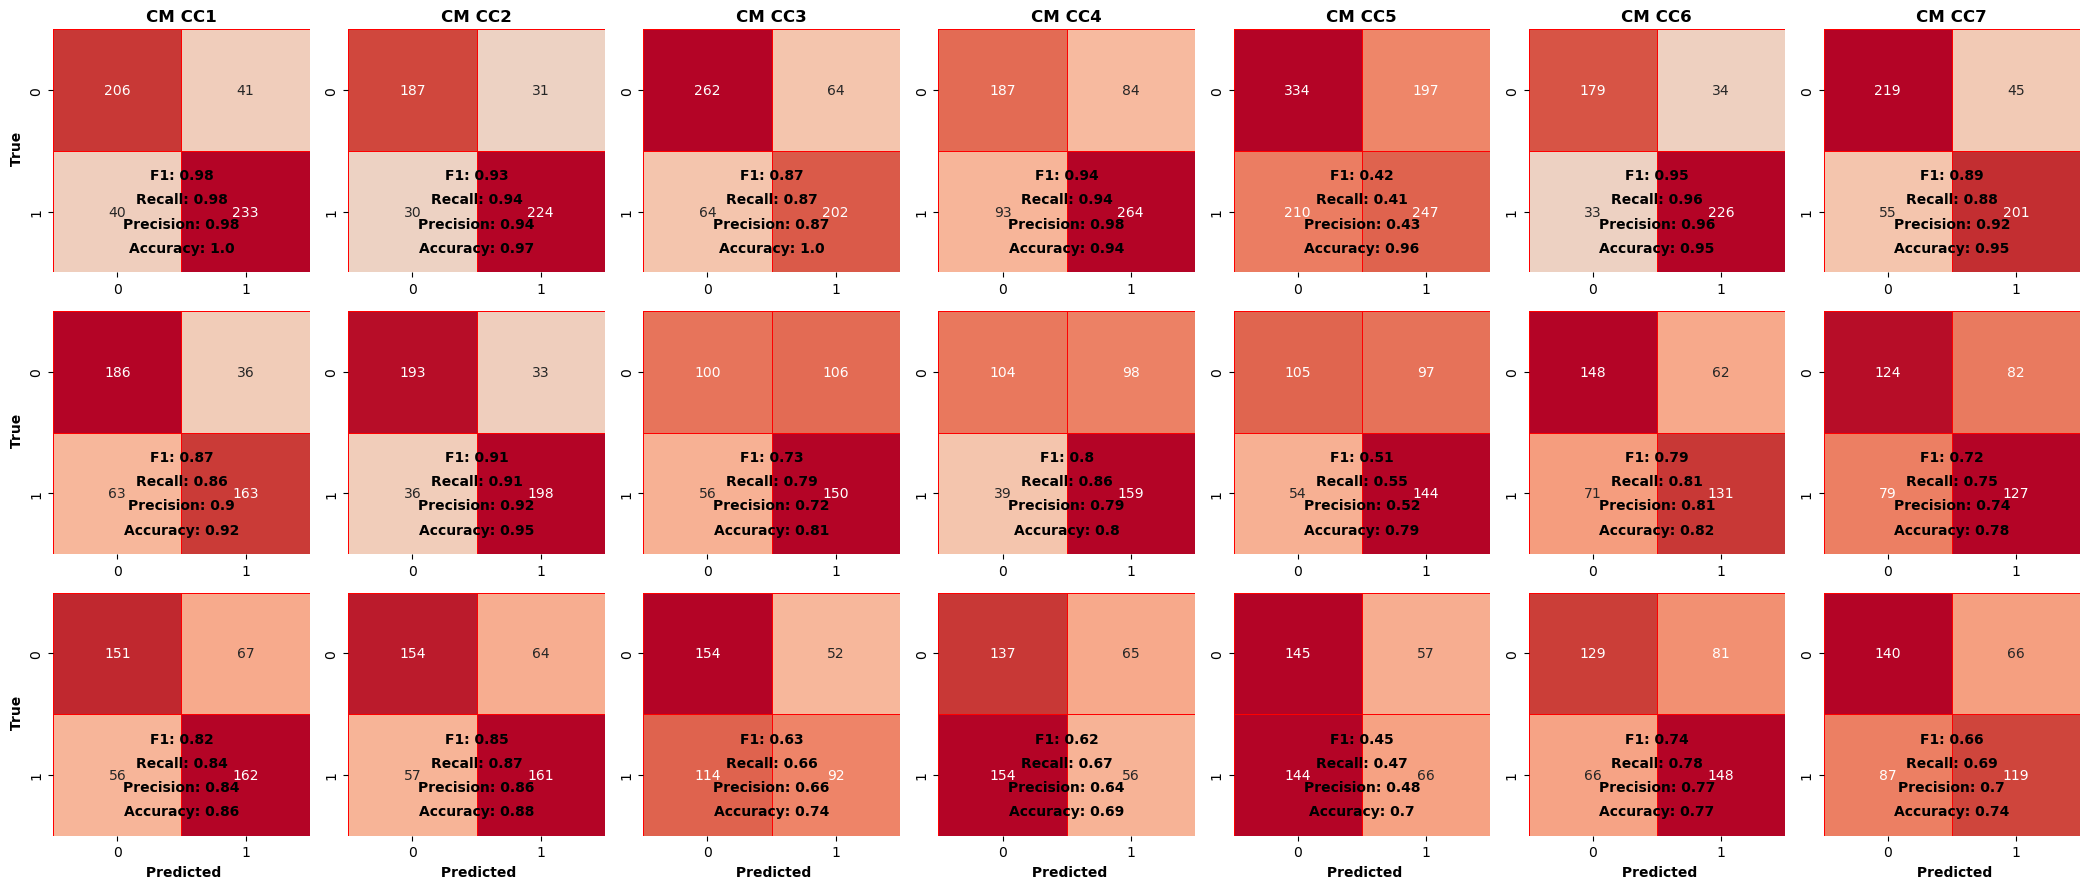

In [54]:
CM=np.zeros((2,2,3,7))
Scoreknnall=np.zeros((7,3))
Precisionknnall=np.zeros((7,3))
Recallknnall=np.zeros((7,3))
F1knnall=np.zeros((7,3))
RocAucScoreknnall=np.zeros((7,3))


for CC in range(1,8):
    scoreknn=[]
    precisionknn=[]
    recallknn=[]
    f1knn=[]
    roc_auc_scoreknn=[]

    dataRaw=dataDTIallCC[CC-1]
    list_of_selfeatures=list_of_selfeaturesallCC[CC-1][nFeatures]
    data=pd.concat([dataRaw.loc[:,list_of_selfeatures], SubjectTable], axis=1)

    dataKmeans=data.drop(['sub','sex','age','group_O', 'group_Y', 'JND_group', 'group','JND_P'], axis=1)

    ############################################
    X=dataKmeans
    scaler = RobustScaler()
    Xscaled = scaler.fit_transform(X)
    Xscaled = pd.DataFrame(Xscaled, columns=X.columns)

    #KMEANS  
    kmeans = KMeans(n_clusters=nclust,n_init="auto").fit(Xscaled)
    labels_CC = kmeans.labels_
    data["cluster"]=labels_CC

    for targetVar in [0,1,2]:
        
        if targetVar==1:
            targetVarStr='Group'
            Y_group=data["group_Y"] 
            targetnames=['Y','O']
        elif targetVar==2:
            Y_group=data["JND_group"] 
            targetVarStr='JND'
            targetnames=['0','1']   
        elif targetVar==0:
            targetVarStr='Cluster'
            targetnames=['1','2']   
            Y_group=data["cluster"] 

        y=Y_group 

        # split into inputs and outputs
        X, y = Xscaled.values, y

        for i in range(100):
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=i)

                param_grid = {'n_neighbors': np.arange(1, 10),'weights': ['uniform', 'distance']}
                model = KNeighborsClassifier()
                grid = GridSearchCV(model, param_grid, cv=5)
                grid.fit(X_train, y_train)
            
                bestmodel=grid.best_estimator_
                
                scoreknn.append(bestmodel.score(X_test, y_test))
                precisionknn.append(precision_score(y_test, bestmodel.predict(X_test), average='binary'))
                recallknn.append(recall_score(y_test, bestmodel.predict(X_test), average='binary'))
                f1knn.append(f1_score(y_test, bestmodel.predict(X_test), average='binary'))

                CM[:,:,targetVar,CC-1]=confusion_matrix(y_test, bestmodel.predict(X_test))+CM[:,:,targetVar,CC-1]

        
        Scoreknnall[CC-1,targetVar]=np.mean(scoreknn)
        Precisionknnall[CC-1,targetVar]=np.mean(precisionknn)
        Recallknnall[CC-1,targetVar]=np.mean(recallknn)
        F1knnall[CC-1,targetVar]=np.mean(f1knn)



fig,ax = plt.subplots(3,7, figsize=(21,9))

for CC in range(1,8):

    for targetVar in [0,1,2]:
        targetVarStr=['Cluster','Group','JND']

        ax1=ax[targetVar,CC-1]
        sns.heatmap(CM[:,:,targetVar,CC-1],annot = True, linewidths= 0.5, linecolor="red", fmt=".0f",cmap='coolwarm',center=0,ax= ax1,cbar=False)
        
        if targetVar==0:
            ax1.set_title('CM CC' + str(CC),weight='bold')
        if targetVar==2:
            ax1.set_xlabel(' Predicted',weight='bold')
        if CC==1:
            ax1.set_ylabel(' True',weight='bold')

        ax1.text(0.5, 0.1, 'Accuracy: '+str(round(Scoreknnall[CC-1,targetVar],2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,weight='bold')
        ax1.text(0.5, 0.2, 'Precision: '+str(round(Precisionknnall[CC-1,targetVar],2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,weight='bold')
        ax1.text(0.5, 0.3, 'Recall: '+str(round(Recallknnall[CC-1,targetVar],2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,weight='bold')
        ax1.text(0.5, 0.4, 'F1: '+str(round(F1knnall[CC-1,targetVar],2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,weight='bold')

plt.tight_layout()

plt.savefig(os.path.join(pathsavefigure,'NEW_ConfusionMatrix' +'_nfeat_'+str(nFeatures)+addtocc+'_figure8.pdf'), dpi=300, bbox_inches='tight')


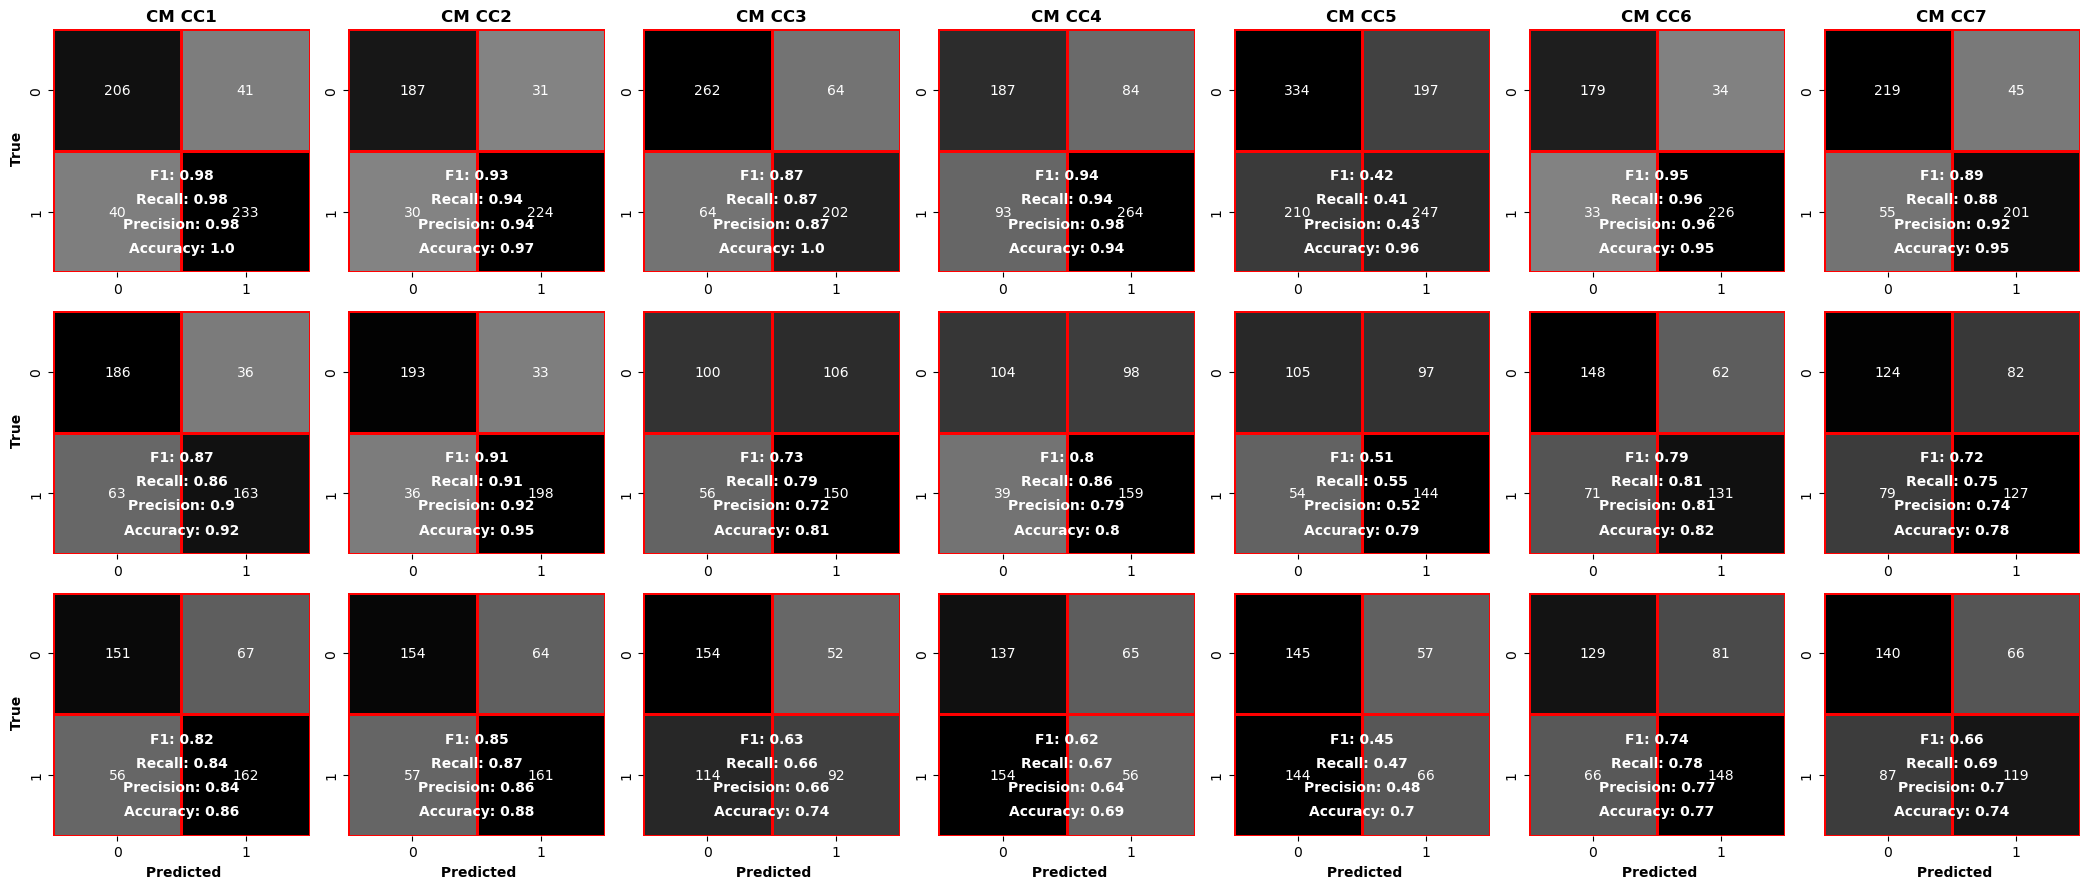

In [63]:

fig,ax = plt.subplots(3,7, figsize=(21,9))

for CC in range(1,8):

    for targetVar in [0,1,2]:
        targetVarStr=['Cluster','Group','JND']

        ax1=ax[targetVar,CC-1]
        sns.heatmap(CM[:,:,targetVar,CC-1],annot = True, linewidths= 1, linecolor="red", fmt=".0f",cmap='Greys',center=0,ax= ax1,cbar=False)
        
        if targetVar==0:
            ax1.set_title('CM CC' + str(CC),weight='bold')
        if targetVar==2:
            ax1.set_xlabel(' Predicted',weight='bold')
        if CC==1:
            ax1.set_ylabel(' True',weight='bold')

        ax1.text(0.5, 0.1, 'Accuracy: '+str(round(Scoreknnall[CC-1,targetVar],2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,weight='bold',color='white')
        ax1.text(0.5, 0.2, 'Precision: '+str(round(Precisionknnall[CC-1,targetVar],2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,weight='bold',color='white')
        ax1.text(0.5, 0.3, 'Recall: '+str(round(Recallknnall[CC-1,targetVar],2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,weight='bold',color='white')
        ax1.text(0.5, 0.4, 'F1: '+str(round(F1knnall[CC-1,targetVar],2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,weight='bold',color='white')

plt.tight_layout()

plt.savefig(os.path.join(pathsavefigure,'NEW_ConfusionMatrix' +'_nfeat_'+str(nFeatures)+addtocc+'_figure8.pdf'), dpi=300, bbox_inches='tight')
